In [1]:
#          ######################################################################################################
#          #                                      IN THE NAME OF ALLAH                                          #
#          #      STEEL-CONCRETE COMPOSITE PLATE GIRDERS BRIDGE SUPERSTRUCTURE INELASTIC RESPONSE SPECTRUM      #
#          #                     EVALUATION OF AXIAL, SECTION, STRUCTURE DUCTILITY DAMAGE INDEX                 #
#          #----------------------------------------------------------------------------------------------------#
#          #                          THIS PROGRAM WRITTEN BY SALAR DELAVAR QASHQAI                             #
#          #                               EMAIL: salar.d.ghashghaei@gmail.com                                  #
#          ######################################################################################################

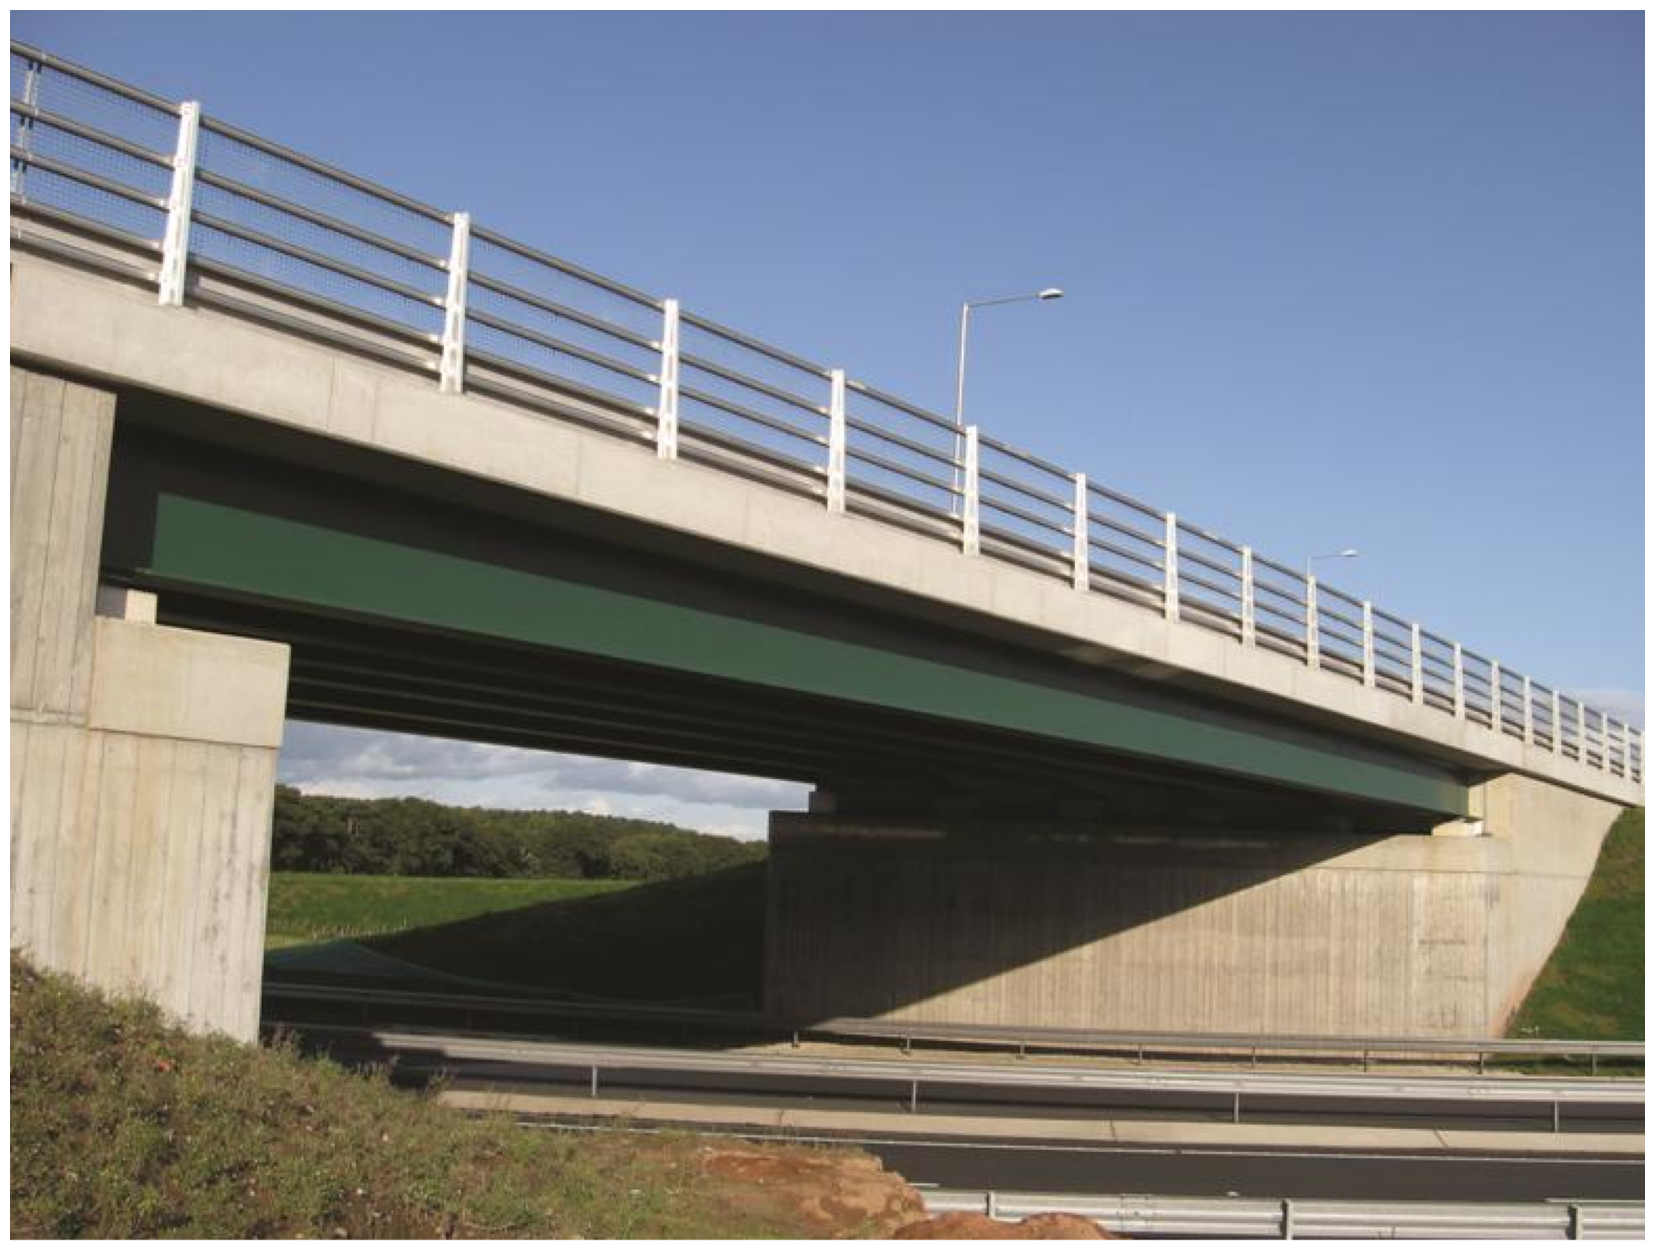

In [3]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(30, 16))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_SINGLE_SPAN_SIMPLY_SUPPORTED_COMPOSITE_BRIDGE_00.png'    
PLOT_IMAGE(image_path)

In [4]:
# BRIDGE IMAGES AND DATA
'https://www.steelconstruction.info/A1_Peterborough_to_Blyth'
# BOOK: Finite Element Analysis and Design of Steel and Steel–Concrete Composite Bridges
'https://www.sciencedirect.com/book/9780124172470/finite-element-analysis-and-design-of-steel-and-steel-concrete-composite-bridges'
# BOOK: Steel-concrete composite bridge design guide
'https://www.nzta.govt.nz/assets/resources/research/reports/525/docs/525.pdf' 
# BOOK: Highway Bridge Superstructure Engineering; LRFD Approaches to Design and Analysis-Narendra Taly-CRC Press
'https://www.routledge.com/Highway-Bridge-Superstructure-Engineering-LRFD-Approaches-to-Design-and-Analysis/Taly/p/book/9781466552180?srsltid=AfmBOoo5LQjvUG7nz6f90vuEZNIAuUnmgXMHTyq3wx7YIGd1y2cAMQtI'
# PAPER: Seismic damage prediction by deterministic methods: Concepts and procedures
'https://onlinelibrary.wiley.com/doi/10.1002/eqe.4290160507'

'https://onlinelibrary.wiley.com/doi/10.1002/eqe.4290160507'

In [5]:
# pip install openseespy
# pip install --upgrade openseespy
# pip install opsvis

In [6]:
#import the os module
import os
import time
import numpy as np
import openseespy.opensees as op
import opsvis as opsv
import matplotlib.pyplot as plt

In [7]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\OPENSEESPY_SALAR'

In [8]:
FOLDER_NAME = 'COMPOSITE_BRIDGE_RESPONSE'
dir = f"C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\"
if not os.path.exists(dir):
    os.makedirs(dir)

In [9]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)   

In [10]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';

In [11]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.4f}')
    print(f'First quartile: {q1:.4f}')
    #print(f'Mode: {MODE:.4f}')
    print(f'Median: {MEDIAN:.4f}')
    print(f'Mean: {MEAN:.4f}')
    print(f'Std: {STD:.4f}')
    print(f'Third quartile: {q3:.4f}')
    print(f'Maximum: {MAXIMUM :.4f}')
    print(f'Skewness: {skew(X) :.4f}')
    print(f'kurtosis: {kurtosis(X) :.4f}')
    print(f"90% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.4f}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.4f}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.4f}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.4f}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.4f}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.4f}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.4f}")
    plt.text(q3, 1.05, f" Q3: {q3:.4f}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.4f}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.4f}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.4f}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.4f}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.4f}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------    
def HISTOGRAM_BOXPLOT_PLOTLY( DATA, XLABEL='X', TITLE='A', COLOR='cyan'):
    # Plotting histogram and boxplot
    import plotly.express as px
    fig = px.histogram(x=DATA, marginal="box", color_discrete_sequence=[COLOR])
    fig.update_layout(title=TITLE, xaxis_title=XLABEL, yaxis_title="Frequency")
    fig.show()     
# -----------------------------------------------
def PLOT_TIME_HIS(x, xlabel, y1, y1label, y2, y2label, y3, y3label, y4, y4label, Z, LOGX, LOGY):
    ## PLOT THE DATA
    import numpy as np
    import matplotlib.pyplot as plt
    # Define colors for each dataset
    colors = ['b', 'g', 'r', 'c']

    # Create subplots based on the value of Z
    fig, axs = plt.subplots(Z, 1, figsize=(14, 14))

    # Plot each dataset with a different color
    for i, y_data in enumerate([y1, y2, y3, y4][:Z]):
        axs[i].plot(x, y_data, color=colors[i])
        axs[i].set_title(f"{[y1label, y2label, y3label, y4label][i]} - MAX ABS: {np.max(np.abs(y_data)):.6e}")
        axs[i].set_xlabel(xlabel)
        #axs[i].set_ylabel()
        axs[i].grid()
        if LOGX == 1:
            axs[i].semilogx()
        if LOGY == 1:
            axs[i].semilogy()    

    # Adjust layout
    plt.tight_layout()
    plt.show()  
# -----------------------------------------------    
def MAXABS_FUN(DATA_FILE, COLUMN, I, J, Z):
    import numpy as np
    # Read and process displacement data
    if Z == 1:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))
    if Z == 2:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}_{J}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))    
    #print("MAX. ABS. :", MAXABS)
    return MAXABS
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit,X2, Y2, XLABEL, YLABEL, TITLE, COLOR, Z):
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(12, 8))
    if Z == 1:
        # Plot 1 line
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend(['curve', 'bilinear fitted'], loc='lower right')
        plt.grid(True)
        plt.show()
    if Z == 3:
        plt.plot(X, Y, Xfit, Yfit, 'r--', X2, Y2, 'green', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend(['curve', 'bilinear fitted','Dyn.'], loc='lower right')
        plt.grid(True)
        plt.show()     
        
# -----------------------------------------------
def OUTPUT_SECOND_COLUMN(FOLDER, X, COLUMN, I, Z):
    import numpy as np
    # Time History
    if Z == 1:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]
    if Z == 2:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}_{I}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]    
    return X 
# -----------------------------------------------
def BILNEAR_CURVE(Cur, Mom, SLOPE_NODE):
    import numpy as np
    # bilinear fitting
    SIZE = len(Mom)
    hh = np.zeros(SIZE-1)
    Aa = np.zeros(SIZE-1)
    for i in range(SIZE-1):
        hh[i] = Cur[i+1] - Cur[i]
        Aa[i] = (Mom[i] + Mom[i+1]) * 0.5 * hh[i]

    Area = sum(Aa)
    k0 = Mom[SLOPE_NODE] / Cur[SLOPE_NODE]
    fiy = (Mom[i+1] * max(Cur) * 0.5 - Area) / (Mom[i+1] * 0.5 - k0 * max(Cur) * 0.5)
    My = k0 * fiy
    X = np.array([0, fiy, max(Cur)])
    Y = np.array([0, My, Mom[i+1]])
    
    # EI and Ductility_Rito
    Elastic_ST = Y[1] / X[1]
    Plastic_ST = Y[2] / X[2]
    Tangent_ST = (Y[2] - Y[1]) / (X[2] - X[1])
    Ductility_Rito = X[2] / X[1]
    Over_Strength_Factor = Y[2] / Y[1]
    """
    # MOMENT-CURVAVTURE ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('  Curvature    Moment')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    print('+--------------------------------------------------------------------+')
    print(f' Elastic Flextural Rigidity :             {Elastic_EI:.2f}')
    print(f' Plastic Flextural Rigidity :             {Plastic_EI:.2f}')
    print(f' Tangent Flextural Rigidity :             {Tangent_EI:.2f}')
    print(f' Section Ductility Ratio :                {Ductility_Rito:.2f}')
    print(f' Section Over Stregth Factor:             {Over_Stregth_Factor:.2f}')
    print('+--------------------------------------------------------------------+')
    """
    """
    # PUSHOVER ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('     Disp       Baser Shear')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    print('+----------------------------------------------------+')
    print(f' Structure Elastic Stiffness :     {Elastic_ST:.2f}')
    print(f' Structure Plastic Stiffness :     {Plastic_ST:.2f}')
    print(f' Structure Tangent Stiffness :     {Tangent_ST:.2f}')
    print(f' Structure Ductility Ratio :       {Ductility_Rito:.2f}')
    print(f' Structure Over Strength Factor:   {Over_Strength_Factor:.2f}')
    print('+----------------------------------------------------+')
    """
    return X, Y, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, X2, Y2, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z):
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(12, 8))
    if Z == 1:
        # Plot 1 line
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        # Plot 2 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02], loc='lower right')
        plt.grid(True)
        plt.show()
    if Z == 3:
        # Plot 3 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', X2, Y2, 'g-*', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02, LEGEND03], loc='lower right')
        plt.grid(True)
        plt.show() 
# -----------------------------------------------
def PLOT3D(X, Y, Z, XLABEL, YLABEL, ZLABEL, TITLE):
    import plotly.graph_objects as go
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker=dict(size=5, color=Z))])
    fig.update_layout(scene=dict(xaxis_title=XLABEL, yaxis_title=YLABEL, zaxis_title=ZLABEL), title=TITLE)
    fig.show()
# -----------------------------------------------     
# Create a scatter plot
def PLOT_SCATTER(X, Y , XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import matplotlib.pyplot as plt
    # Calculate linear regression parameters
    import numpy as np
    coefficients = np.polyfit(X, Y, ORDER)
    if ORDER == 1:
        a, b = coefficients
    if ORDER == 2:
        a, b, c = coefficients    
    if ORDER == 3:
        a, b, c, d = coefficients   
    if ORDER == 4:
        a, b, c, d, e = coefficients  
    if ORDER == 5:
        a, b, c, d, e, f = coefficients  
    if ORDER == 6:
        a, b, c, d, e, f, I = coefficients   
    if ORDER == 7:
        a, b, c, d, e, f, I, J = coefficients     
    y = [];yy = [];
    for i in range(len(X)):
        if ORDER == 1:
            y.append(a * X[i] + b)
        if ORDER == 2:
            y.append(a * X[i]**2 + b * X[i] + c)
        if ORDER == 3:
            y.append(a * X[i]**3 + b * X[i]**2 + c * X[i] + d)    
        if ORDER == 4:
            y.append(a * X[i]**4 + b * X[i]**3 + c * X[i]**2 + d * X[i] + e)  
        if ORDER == 5:
            y.append(a * X[i]**5 + b * X[i]**4 + c * X[i]**3 + d * X[i]**2 + e * X[i] + f)    
        if ORDER == 6:
            y.append(a * X[i]**6 + b * X[i]**5 + c * X[i]**4 + d * X[i]**3 + e * X[i]**2 + f * X[i] + I)     
        if ORDER == 7:
            y.append(a * X[i]**7 + b * X[i]**6 + c * X[i]**5 + d * X[i]**4 + e * X[i]**3 + f * X[i]**2 + I * X[i] + J)     
        yy.append(Y[i] - y[-1])
    y = np.array(y)    
    yy = np.array(yy) 
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    # Calculate RSS
    RSS = np.sum(yy ** 2)
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    #print(f"R-squared value: {R_squared:.4f}")
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color=COLOR, marker='o', label='Data')
    # Add labels and title
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    # Add the linear regression line
    if ORDER == 1:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x + {b:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 2:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^2 + {b:.2f}x + {c:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 3:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 4:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^4 + {b:.2f}x^3 + {c:.2f}x^2 + {d:.2f}x + {e:.2f} - R^2 = {R_squared:.3f}') 
    if ORDER == 5:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^5 + {b:.2f}x^4 + {c:.2f}x^3 + {d:.2f}x^2 + {e:.2f}x + {f:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 6:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^6 + {b:.2f}x^5 + {c:.2f}x^4 + {d:.2f}x^3 + {e:.2f}x^2 + {f:.2f}x + {I:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 7:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^7 + {b:.2f}x^6 + {c:.2f}x^5 + {d:.2f}x^4 + {e:.2f}x^3 + {f:.2f}x^2 + {I:.2f}x + {J:.2f} - R^2 = {R_squared:.3f}')               
    
    plt.title(TITLE)
    plt.grid(True)
    plt.legend()
    if LOG == 1:
        plt.semilogx();plt.semilogy();
    plt.show()

# -----------------------------------------------
def PLOT_SCATTER_PLOTLY(X, Y, XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import plotly.graph_objects as go
    import numpy as np
    # Calculate linear regression parameters
    coefficients = np.polyfit(X, Y, ORDER)
    y = np.polyval(coefficients, X)
    
    # Calculate residuals
    residuals = Y - y
    
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    
    # Calculate RSS
    RSS = np.sum(residuals ** 2)
    
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    
    # Create scatter plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', marker=dict(color=COLOR), name='Data'))
    
    # Add the regression line
    fig.add_trace(go.Scatter(x=X, y=y, mode='lines', line=dict(color='black'),
                             name=f'Fit: R^2 = {R_squared:.3f}'))
    
    # Add labels and title
    fig.update_layout(
        title=TITLE,
        xaxis_title=XLABEL,
        yaxis_title=YLABEL,
        showlegend=True
    )
    
    # Set log scale if needed
    if LOG == 1:
        fig.update_xaxes(type="log")
        fig.update_yaxes(type="log")
    
    fig.show() 
# -----------------------------------------------
def plot_scatter_plotly(X, Y, XLABEL, YLABEL, TITLE, COLOR):
    import plotly.express as px
    fig = px.scatter(x=X, y=Y, color_discrete_sequence=[COLOR], labels={XLABEL: XLABEL, YLABEL: YLABEL})
    fig.update_layout(title=TITLE, xaxis_type='log', yaxis_type='log')
    fig.show() 
# ----------------------------------------------- 
def PLOT_HEATMAP(df):
    import plotly.figure_factory as ff
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a correlation heatmap
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(5).values,
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout
    fig.update_layout(
        title='Correlation Heatmap',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
        width=1200, height=1200
    )

    fig.show()
    
# -----------------------------------------------     
"""
Long short-term memory (LSTM) is a type
of recurrent neural network (RNN) aimed
at dealing with the vanishing gradient
problem present in traditional RNNs
"""
def PREDICT_LSTM(x, y, look_back, ITERATION):
    import numpy as np
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    # Prepare data for LSTM
    trainX, trainY = [], []
    for i in range(len(x) - look_back):
        trainX.append(x[i:i + look_back])
        trainY.append(y[i + look_back])

    trainX, trainY = np.array(trainX), np.array(trainY)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs= ITERATION, batch_size=1, verbose=2)

    # Predict the next 'y' value
    next_x = np.array(x[-look_back:]).reshape(1, look_back, 1)
    predicted_y = model.predict(next_x)
    return predicted_y 

# -----------------------------------------------    
def Normal_CDF_Newton_Raphson(P_f, EPS=1e-3, tol=1e-6, max_iter=1000000):
    from scipy.stats import norm
    x = 0.0  # Initial guess (you can choose any value)
    
    for i in range(max_iter):
        xmin = x - EPS
        xmax = x + EPS
        f = norm.cdf(-x) - P_f
        fmin = norm.cdf(-xmin) - P_f
        fmax = norm.cdf(-xmax) - P_f
        df = (fmax - fmin) / (2 * EPS)
        dx = f / df
        f_prime_x = -norm.pdf(-x)
        
        if abs(dx) < tol:
            break
        
        x -= dx
    
    return x
# ----------------------------------------------- 
def MIX_HISTOGRAM(x, y, BINS, X, Y, TITLE):
    plt.figure(figsize=(8, 6))
    plt.hist(x, bins=BINS, alpha=0.5, label=X, color='blue')
    plt.hist(y, bins=BINS, alpha=0.5, label=Y, color='red')
    plt.legend(loc='upper right')
    plt.xlabel("Samples")
    plt.ylabel("Frequency")
    plt.title(TITLE)
    plt.show()
# -----------------------------------------------     
def plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE):
    import matplotlib.pyplot as plt
    """
    Plots multiple lines on the same graph.

    Parameters:
    x (list): List of x values.
    y_list (list of lists): List containing lists of y values for each line.
    labels (list): List of labels for each line.
    """
    for y, label in zip(y_list, LABELS):
        plt.plot(x, y, label=label)
    
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------         
def DUCTILITY_DAMAGE_INDEX(x, YIELD, ULTIMATE):
    DI = (x - YIELD) / (ULTIMATE - YIELD)
    return DI     
# -----------------------------------------------         
def STRENGTH_DAMAGE_INDEX(x, YIELD, ULTIMATE):
    DI = (x - YIELD) / (ULTIMATE - YIELD)
    return DI    

In [12]:
### -------------------------
###  DEFINE AND PLOT SECTION
### -------------------------
def Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z,
                                 Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03, PLOT, OUTPUT, I):

    import openseespy.opensees as op
    import opsvis as opsv
    import numpy as np
    
    Mat_Tag01 = 1 # Confined Concrete Section Tag
    Mat_Tag02 = 2 # Steel Plate Section Tag
    Mat_Tag03 = 3 # Steel Rebar Section Tag

    
    fc = -35 # [N/mm^2] Nominal concrete compressive strength
    Ec = 4700 * np.sqrt(-fc) # [N/mm^2] Concrete Elastic Modulus (the term in sqr root needs to be in psi

    # confined concrete
    Kfc = 1.3;			# ratio of confined to unconfined concrete strength - COLUMN
    fc1C = Kfc*fc;		# CONFINED concrete (mander model), maximum stress - COLUMN
    KfcB = 1.1;			# ratio of confined to unconfined concrete strength - BEAM
    fc1CB = KfcB*fc;		# CONFINED concrete (mander model), maximum stress - BEAM

    eps1C = 2*fc1C/Ec;	# strain at maximum stress 
    fc2C = 0.2*fc1C;		# ultimate stress
    eps2C = 5*eps1C;		# strain at ultimate stress 
    # unconfined concrete
    fc1U = fc;			# UNCONFINED concrete (todeschini parabolic model), maximum stress
    eps1U = -0.0025;			# strain at maximum strength of unconfined concrete
    fc2U = 0.2*fc1U;		# ultimate stress
    eps2U = -0.012;			# strain at ultimate stress
    Lambda = 0.1;				# ratio between unloading slope at $eps2 and initial slope $Ec
    # tensile-strength properties
    ftC = -0.55*fc1C;		# tensile strength +tension
    ftU = -0.55*fc1U;		# tensile strength +tension
    Ets = ftU/0.002;		# tension softening stiffness
    # PLATE MATERIAL PROPERTIES:
    FyP = 360			# Steel rebar yield stress
    CyP = 0.0018			# Steel rebar yield strain
    EsP = FyP/CyP				# modulus of steel
    BsP = 0.01				# strain-hardening ratio 
    R0P = 18.0				# control the transition from elastic to plastic branches
    cR1P = 0.925				# control the transition from elastic to plastic branches
    cR2P = 0.15				# control the transition from elastic to plastic branches
    # REBAR MATERIAL PROPERTIES:
    Fy = 4000			# Steel rebar yield stress
    Cy = 0.02			# Steel rebar yield strain
    Es = Fy/Cy				# modulus of steel
    Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    # COLUMN
    op.uniaxialMaterial('Concrete02', Mat_Tag01, fc1C, eps1C, fc2C, eps2C, Lambda, ftC, Ets) # build core concrete (confined)
    op.uniaxialMaterial('Steel02', Mat_Tag02, FyP, EsP, BsP, R0P,cR1P,cR2P) # build plate material
    op.uniaxialMaterial('Steel02', Mat_Tag03, Fy, Es, Bs, R0,cR1,cR2) # build reinforcement material
    


    #nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    #nFibY = 10 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    As01 = (np.pi * (0.5 * DA01)**2) # [mm^2] SideWalk Rebar Area
    As02 = (np.pi * (0.5 * DA02)**2) # [mm^2] Deck Rebar Area
    As03 = (np.pi * (0.5 * DA03)**2) # [mm^2] Box Rebar Area
    
    hw = H - tf01 - tf02# Top Web Plate Height Beam
    # SIDEWALK
    rey1 = SideWalk_y - cover
    rez1 = SideWalk_z - cover
    # DECK
    rey2 = Deck_y - cover
    rez2 = Deck_z - cover
    # BOX
    rey3 = Box_y - cover
    rez3 = Box_z - cover

    FIBER_SEC = [['section', 'Fiber', Section_Tag, '-GJ', 1.0e6],
                 # CONCRETE SECION SIDEWALK
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, SideWalk_y, -Deck_z+SideWalk_C, 0, -Deck_z-SideWalk_z],# Left Side Walk
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, SideWalk_y, Deck_z+SideWalk_z, 0, +Deck_z-SideWalk_C],# Right Side Walk
                 # CONCRETE SECION DECK
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y, -Deck_z, 0, +Deck_z],# Road Deck
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y, -Deck_z, 0, +Deck_z],# Road Deck
                 # CONCRETE SECION BOX
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Deck_z+Z1, -Deck_y, -Deck_z+Box_z+Z1],# Road Deck Box Right 01
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Deck_z+Box_z+Z1+Z2, -Deck_y, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Box Right 02
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Box_z*0.5, -Deck_y, Box_z*0.5],# Road Deck Box Center
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, +Deck_z-Box_z-Z1, -Deck_y, +Deck_z-Z1],# Road Deck Box Left 01
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Box Left 02
                 # STEEL TOP FLANGE PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Deck_z+Z1, -Deck_y-Box_y, -Deck_z+Box_z+Z1],# Road Deck Top Flange Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Deck_z+Box_z+(Z1+Z2), -Deck_y-Box_y, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Top Flange Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Box_z*0.5, -Deck_y-Box_y, Box_z*0.5],# Road Deck Top Flange Center
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, +Deck_z-Box_z-Z1, -Deck_y-Box_y, +Deck_z-Z1],# Road Deck Top Flange Left 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y-Box_y, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Top Flange Left 02
                 # STEEL BOTTOM FLANGE PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Deck_z+Z1, -Deck_y-Box_y-tf01-hw, -Deck_z+Box_z+Z1],# Road Deck Top Flange Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Deck_z+Box_z+(Z1+Z2), -Deck_y-Box_y-tf01-hw, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Top Flange Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Box_z*0.5, -Deck_y-Box_y-tf01-hw, Box_z*0.5],# Road Deck Top Flange Center
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-Z1, -Deck_y-Box_y-tf01-hw, +Deck_z-Z1],# Road Deck Top Flange Left 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y-Box_y-tf01-hw, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Top Flange Left 02
                 # STEEL WEB PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+Z1-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+Z1+0.5*tw],# Road Deck Web Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(2*Z1+Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(2*Z1+Z2)+0.5*tw],# Road Deck Web Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(3*Z1+2*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(3*Z1+2*Z2)+0.5*tw],# Road Deck Web Right 03
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(4*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(4*Z2)+0.5*tw],# Road Deck Web Right 04
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(Z1+5*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(Z1+5*Z2)+0.5*tw],# Road Deck Web Right 05
                 # STEEL REBAR
                 ['layer', 'straight', Mat_Tag03, 10, As01, rey1, Deck_z+rez1, rey1, Deck_z-SideWalk_C+cover],# TOP REBAR LAYERS - SIDEWALK RIGHT
                 ['layer', 'straight', Mat_Tag03, 10, As01, cover, Deck_z+rez1, cover, Deck_z-SideWalk_C+cover],# BOTTOM REBAR LAYERS - SIDEWALK RIGHT
                 ['layer', 'straight', Mat_Tag03, 10, As01, rey1, -(Deck_z+rez1), rey1, -(Deck_z-SideWalk_C+cover)],# TOP REBAR LAYERS - SIDEWALK LEFT
                 ['layer', 'straight', Mat_Tag03, 10, As01,  cover, -(Deck_z+rez1),  cover, -(Deck_z-SideWalk_C+cover)],# BOTTOM REBAR LAYERS - SIDEWALK LEFT
                 ['layer', 'straight', Mat_Tag03, 65, As02, -rey2, -rez2, -rey2, rez2],# BOTTOM REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03, 65, As02, -Deck_y*0.5, -rez2, -Deck_y*0.5, rez2],# MIDDLE REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03, 65, As02, -cover, -rez2, -cover, rez2],# TOP REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Deck_z+Z1+cover, -(Deck_y+rey3), -Deck_z+Box_z+Z1-cover],# BOTTOM REBAR LAYERS - BOX 01
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Deck_z+Z1+cover, -(Deck_y+cover), -Deck_z+Box_z+Z1-cover],# TOP REBAR LAYERS - BOX 01
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Deck_z+Box_z+Z1+Z2+cover, -(Deck_y+rey3), -Deck_z+Box_z+(2*Z1+Z2)-cover],# BOTTOM REBAR LAYERS - BOX 02
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Deck_z+Box_z+Z1+Z2+cover, -(Deck_y+cover), -Deck_z+Box_z+(2*Z1+Z2)-cover],# TOP REBAR LAYERS - BOX 02
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Box_z*0.5+cover, -(Deck_y+rey3), Box_z*0.5-cover],# BOTTOM REBAR LAYERS - BOX 03 - MIDDLE
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Box_z*0.5+cover, -(Deck_y+cover), Box_z*0.5-cover],# TOP REBAR LAYERS - BOX 03 - MIDDLE
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), Deck_z-Z1-cover, -(Deck_y+rey3), Deck_z-Box_z-Z1+cover],# BOTTOM REBAR LAYERS - BOX 05
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), Deck_z-Z1-cover, -(Deck_y+cover), Deck_z-Box_z-Z1+cover],# TOP REBAR LAYERS - BOX 05
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), Deck_z-Box_z-Z1-Z2-cover, -(Deck_y+rey3), Deck_z-Box_z-(2*Z1+Z2)+cover],# BOTTOM REBAR LAYERS - BOX 04
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), Deck_z-Box_z-Z1-Z2-cover, -(Deck_y+cover), Deck_z-Box_z-(2*Z1+Z2)+cover],# TOP REBAR LAYERS - BOX 04

                ]

    if PLOT == 1:
        matcolor = ['gold', 'lightgrey']
        plt.figure(1)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        # Set the x and y limits
        plt.ylim(-1000, 1000)
        plt.xlim(-1500,-6850) # RIGHT
        plt.show()
        
        plt.figure(2)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-2500, 300)
        plt.xlim(-1500,-6850) #  RIGHT
        plt.show()

        plt.figure(3)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-1000, 1000)
        plt.xlim(600,-600) #  MIDDLE
        plt.show()

        plt.figure(4)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-2500, 300)
        plt.xlim(6850,1500) # LEFT
        plt.show()
        
        plt.figure(5)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-1000, 1000)
        plt.xlim(6850,1500) # LEFT
        plt.show()

        plt.figure(6)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.axis('equal')
        plt.show()
        
    # CONCRETE FIBER
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_01_{I}.txt','section', 5,'fiber', SideWalk_y, +Deck_z-SideWalk_C+SideWalk_z,'stressStrain')# concrete fiber 01
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_02_{I}.txt','section', 5,'fiber', 0, +Deck_z,'stressStrain')# concrete fiber 02
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_03_{I}.txt','section', 5,'fiber', -Deck_y, +Deck_z,'stressStrain')# concrete fiber 03
    # STEEL REBAR FIBER
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_01_{I}.txt','section', 5,'fiber', rey1, Deck_z+rez1,'stressStrain')# steel rebar fiber 01 - TOP REBAR LAYERS - SIDEWALK RIGHT
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_02_{I}.txt','section', 5,'fiber', cover, Deck_z+rez1,'stressStrain')# steel rebar fiber 02 - BOTTOM REBAR LAYERS - SIDEWALK RIGHT
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_03_{I}.txt','section', 5,'fiber', -cover, -rez2,'stressStrain')# steel rebar fiber 03 - TOP REBAR LAYERS - DECK
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_04_{I}.txt','section', 5,'fiber', -Deck_y*0.5, -rez2,'stressStrain')# steel rebar fiber 04 - MIDDLE REBAR LAYERS - DECK
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_05_{I}.txt','section', 5,'fiber', -rey2, -rez2,'stressStrain')# steel rebar fiber 05 - BOTTOM REBAR LAYERS - DECK
    # STEEL PLATE FIBER
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberPlate_StressStrain_01_{I}.txt','section', 5,'fiber', -Deck_y-Box_y, +Deck_z-Box_z-(2*Z1+Z2),'stressStrain')# steel plate fiber 01 - TOP PLATE LAYERS
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberPlate_StressStrain_02_{I}.txt','section', 5,'fiber', -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-(2*Z1+Z2),'stressStrain')# steel plate fiber 02 - BOTTOM PLATE LAYERS        
    
    return FIBER_SEC

In [13]:
### -------------------------------
###    MOMENT-CURVATURE FUNCTION
### -------------------------------
import opsvis as opsv
def MC_ANALYSIS(P, DR, numIncr, TOLERANCE, ITERATION, J):
    import openseespy.opensees as op
    def MomentCurvature(ColSecTag, axialLoad, maxK, numIncr):

        # Define two nodes at (0,0)
        op.node(1, 0.0, 0.0)
        op.node(2, 0.0, 0.0)

        # Fix all degrees of freedom except axial and bending
        op.fix(1, 1, 1, 1)
        op.fix(2, 0, 1, 0)

        # Define element
        #                             tag ndI ndJ  secTag
        op.element('zeroLengthSection',  1,   1,   2,  ColSecTag)
        # Create recorder
        op.recorder('Node', '-file', f"{SALAR_DIR}CUR_{J}.txt",'-time', '-node', 2, '-dof', 3, 'disp')# Curvature Time History nodes 2
        op.recorder('Node', '-file', f"{SALAR_DIR}MOM_{J}.txt",'-time', '-node', 1, '-dof', 3, 'reaction')# Base Shear Time History nodes 1

        # Define constant axial load
        op.timeSeries('Constant', 1)
        op.pattern('Plain', 1, 1)
        op.load(2, axialLoad, 0.0, 0.0)

        # Define analysis parameters
        op.integrator('LoadControl', 0.0)
        op.system('SparseGeneral', '-piv')
        op.test('NormUnbalance', TOLERANCE, ITERATION)
        op.numberer('Plain')
        op.constraints('Plain')
        op.algorithm('Newton')
        op.analysis('Static')

        # Do one analysis for constant axial load
        op.analyze(1)

        # Define reference moment
        op.timeSeries('Linear', 2)
        op.pattern('Plain',2, 2)
        op.load(2, 0.0, 0.0, 1.0)

        # Compute curvature increment
        dK = maxK / numIncr

        # Use displacement control at node 2 for section analysis
        op.integrator('DisplacementControl', 2,3,dK,1,dK,dK)

        # Do the section analysis
        op.analyze(numIncr)


    op.wipe()
    
    ####      Start Moment Curvature Analysis
    # Define model builder
    # --------------------
    op.model('basic','-ndm',2,'-ndf',3)
    Section_Tag = 1 # Composite Section Tag
    nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    nFibY = 25 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    FS = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C,
                                      Deck_z, Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03,
                                      PLOT=0, OUTPUT='MC', I=J)
    
    opsv.fib_sec_list_to_cmds(FS)
    
    H = SideWalk_y + Deck_y + Box_y + tf01 + tw + tf02 # I Section Height
    # -----------------------------------------------------------------------------------------------------
    # Yield Concrete Strain
    Cy = 0.004
    # Set Yield Curvature
    Ky = Cy / (0.5 * H)
    #print('Ky', Ky)

    # set ultimate Curvature
    Ku = Ky * DR
    #print('Ku', Ku)


    # Call the section analysis procedure:
    MomentCurvature(Section_Tag, P, Ku, numIncr)
    print(f'{J+1} MC Done.')
    op.wipe()


In [14]:
### -----------------------
###    PUSHOVER FUNCTION
### -----------------------
def PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      H, DA01, DA02, DA03, WEIGHT, ND, NUM_NODES, DMAX, J):
    import openseespy.opensees as op
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D

    # DEFINE BRIDGE COMPOSITE SECTION
    Section_Tag = 1 # Composite Section Tag
    nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    nFibY = 70 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    FS = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C,
                                      Deck_z, Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03,
                                      PLOT=0, OUTPUT='PUSH', I=J)
    opsv.fib_sec_list_to_cmds(FS)
    
    # nodal coordinates:
    LL = Length / (NUM_NODES-1) # Lnength of each Beam elements
    for i in range(0, NUM_NODES):
        op.node(i+1, LL*i, 0.0) # node#, X, Y
        #print(i+1, LL*i)
        
    # Constraints -- Boundary Conditions
    op.fix(1, 1, 1, 0) # node DX DY RZ
    op.fix(NUM_NODES, 1, 1, 0)
    
    op.geomTransf('Linear', 1)
    numIntgrPts = 5
    for i in range(0, NUM_NODES-1):
        op.element('nonlinearBeamColumn', i+1, i+1, i+2, numIntgrPts, Section_Tag, 1)
        #print(i+1, i+1, i+2)
        
    # OUTPUT DATA
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_PUSH_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'disp')# Displacement Time History Node 2
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_01_{J}.txt",'-time', '-node', 1, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_101_{J}.txt",'-time', '-node', NUM_NODES, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 101
    op.recorder('Element', '-file', f"{SALAR_DIR}DEF_PUSH_{J}.txt",'-time', '-ele', 50, 'section', 5, 'deformations')# Curvature Time History 50
    for i in range(0, NUM_NODES-1):
        op.recorder('Element', '-file', f"{SALAR_DIR}LOCALFORCE_PUSH_{i}_{J}.txt",'-time', '-ele', i+1,'localForce')# Local Force Time History for Each Element 
    
    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    for i in range(1, NUM_NODES+1):
        op.load(i, 0.0, -WEIGHT, 0.0)
    print('Model Built')    

    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test
    NstepGravity = 10
    DGravity = 1 / NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero
    Dincr = 0.001 * DMAX
    Vload = 1#Weight
    maxNumIter = 1000
    tol = 1e-8

    op.timeSeries('Linear', 2)
    op.pattern('Plain', 200, 2)
    op.load(ND, 0.0, Vload, 0.0)

    op.wipeAnalysis()
    op.constraints('Plain')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('EnergyIncr', Tol, maxNumIter)
    op.algorithm('Newton')

    IDctrlNode = ND ## INCREMENTAL DISPLACEMENT NODE
    IDctrlDOF = 2 ## INCREMENTAL DISPLACEMENT NODE IN Y DIRECTION

    op.integrator('DisplacementControl', IDctrlNode, IDctrlDOF, Dincr)
    op.analysis('Static')


    Nsteps =  int(DMAX/ Dincr)

    ok = op.analyze(Nsteps)
    #print(ok)


    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)

    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps)                            
                #print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(2, 1)
    #print("u2 = ", u2)
    print(f'{J+1} Pushover Done.')
    op.wipe()
    

In [15]:
### ----------------------
###    DYNAMIC FUNCTION
### ----------------------
def DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      H, DA01, DA02, DA03, MASS, WEIGHT, ND, NUM_NODES, J):
    import openseespy.opensees as op
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D
    
    # DEFINE BRIDGE COMPOSITE SECTION
    Section_Tag = 1 # Composite Section Tag
    nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    nFibY = 70 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    FS = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C,
                                      Deck_z, Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03,
                                      PLOT=0, OUTPUT='DYN', I=J)
    opsv.fib_sec_list_to_cmds(FS)
    
    # nodal coordinates:
    LL = Length / (NUM_NODES-1) # Lnength of each Beam elements
    for i in range(0, NUM_NODES):
        op.node(i+1, LL*i, 0.0) # node#, X, Y
        #print(i+1, LL*i)
        
    # Constraints -- Boundary Conditions
    op.fix(1, 1, 1, 0) # node DX DY RZ
    op.fix(NUM_NODES, 1, 1, 0)
    
    op.geomTransf('Linear', 1)
    numIntgrPts = 5
    for i in range(0, NUM_NODES-1):
        op.element('nonlinearBeamColumn', i+1, i+1, i+2, numIntgrPts, Section_Tag, 1)
        #print(i+1, i+1, i+2)

    # OUTPUT DATA
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MD_{J}.txt" ,'-time','-node',ND,'-dof',2,'disp');# max. displacements of free node ND
    op.recorder('EnvelopeNode','-file',f"{SALAR_DIR}MV_{J}.txt" ,'-time','-node',ND,'-dof',2,'vel');# max. vel of free node ND
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MA_{J}.txt" ,'-time','-node',ND,'-dof',2,'accel');# max. accel of free node ND	
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_DYN_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'disp')# Displacement Time History Node ND
    op.recorder('Node', '-file', f"{SALAR_DIR}VTH_DYN_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'vel')# Velocity Time History Node ND
    op.recorder('Node', '-file', f"{SALAR_DIR}ATH_DYN_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'accel')# Acceleration Time History Node ND
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_01_{J}.txt",'-time', '-node', 1, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_101_{J}.txt",'-time', '-node', NUM_NODES, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 101
    op.recorder('Element', '-file', f"{SALAR_DIR}DEF_DYN_{J}.txt",'-time', '-ele', 50, 'section', 5, 'deformations')# Curvature Time History 50
    for i in range(0, NUM_NODES-1):
        op.recorder('Element', '-file', f"{SALAR_DIR}LOCALFORCE_DYN_{i}_{J}.txt",'-time', '-ele', i+1,'localForce')# Local Force Time History for Each Element 
    
    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    # Define Weight
    for j in range(1, NUM_NODES+1): 
        op.load(j, 0.0, -WEIGHT, 0.0)
        
    # Define Mass
    for j in range(1, NUM_NODES+1): 
        op.mass(j, 0.0, MASS, 0.0)    
    print('Model Built')    

    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test                     # 6
    NstepGravity = 10
    DGravity = 1/NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero

    #applying Dynamic Ground motion analysis
    GMdirection = 2 # 1: x-axis direction 2: y-axis direction
    GMfile = 'BM68elc.acc'
    GMfact = 1.0
    """
    A = []
    for ii in range(1, 3):
        Lambda01 = op.eigen('-fullGenLapack', ii) # eigenvalue mode 1
        Lambda02 = op.eigen('-genBandArpack', ii) # eigenvalue mode 1
        omega = math.pow(max(min(Lambda01), min(Lambda02)), 0.5)
        A.append(omega)
        
    Omega = max(A)
    """
    Lambda01 = op.eigen('-fullGenLapack', 1) # eigenvalue mode 1
    Lambda02 = op.eigen('-genBandArpack', 1) # eigenvalue mode 1
    Omega = np.power(max(min(Lambda01), min(Lambda02)), 0.5)
    
    betaKcomm = 2 * (0.02/Omega)

    xDamp = 0.02				# 2% damping ratio
    alphaM = 0.0				# M-prop. damping; D = alphaM*M	
    betaKcurr = 0.0		# K-proportional damping;      +beatKcurr*KCurrent
    betaKinit = 0.0 # initial-stiffness proportional damping      +beatKinit*Kini

    op.rayleigh(alphaM,betaKcurr, betaKinit, betaKcomm) # RAYLEIGH damping

    # Uniform EXCITATION: acceleration input
    IDloadTag = 400			# load tag
    dt = 0.01			# time step for input ground motion
    maxNumIter = 1000
    op.timeSeries('Path', 2, '-dt', dt, '-filePath', GMfile, '-factor', GMfact)
    op.pattern('UniformExcitation', IDloadTag, GMdirection, '-accel', 2) 

    op.wipeAnalysis()
    op.constraints('Transformation')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('RelativeNormUnbalance', Tol, maxNumIter)
    op.algorithm('RaphsonNewton')

    NewmarkGamma = 0.5
    NewmarkBeta = 0.25
    op.integrator('Newmark', NewmarkGamma, NewmarkBeta)
    op.analysis('Transient')

    DtAnalysis = 0.01
    TmaxAnalysis = 10.0

    Nsteps =  int(TmaxAnalysis/ DtAnalysis)

    ok = op.analyze(Nsteps, DtAnalysis)

    tCurrent = op.getTime()

    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)
    #test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 3:'EnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    #algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 3:'ModifiedNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}
    
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'EnergyIncr',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'ModifiedNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps, DtAnalysis)                            
                print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(ND01, 1)
    #print("u2 = ", u2)
    print(f'{J+1} Dynamic Done.')
    op.wipe()
    T = (2*np.pi)/Omega # Structural Period
    #print(T)
    return T

In [16]:
# COMPOSITE BRIDGE SECTION
Length = 30000 # [mm] Bridge Length
SideWalk_z = 1000 # [mm] SideWalk Width
SideWalk_y = 150 # [mm] SideWalk Height
SideWalk_C = 250 # [mm] SideWalk to deck Connection
Deck_z = 11500/2 # [mm] Bridge Deck Width Concrete Top Flange
Deck_y = 300 # [mm] Bridge Thickness Concrete Top Flange
Box_z = 500 # [mm] Width Concrete Box Under Deck
Box_y = 200 # [mm] Thickness Concrete Box Under Deck
tf01 = 30 # [mm] Top Flange Plate Thickness Beam
bf = Box_z # [mm] Top Flange Plate Thickness Beam (BOX WIDTH, TOP AND BOTTTOM PLATE WIDTH IS THE SAME AN EQUAL)
tf02 = 30 # [mm] Bottom Flange Plate Thickness Beam

tw = 16 # [mm] Top Web Plate Thickness Beam 01

Z1 = 500 # [mm]
Z2 = 2000 # [mm]
cover = 50  # [mm] Concrete Cover
H = 1800 # [mm] I Section Beam Height

DA01 = 30 # [mm] Rebar Diameter for Sidewalk
DA02 = 30 # [mm] Rebar Diameter for Deck
DA03 = 30 # [mm] Rebar Diameter for Box

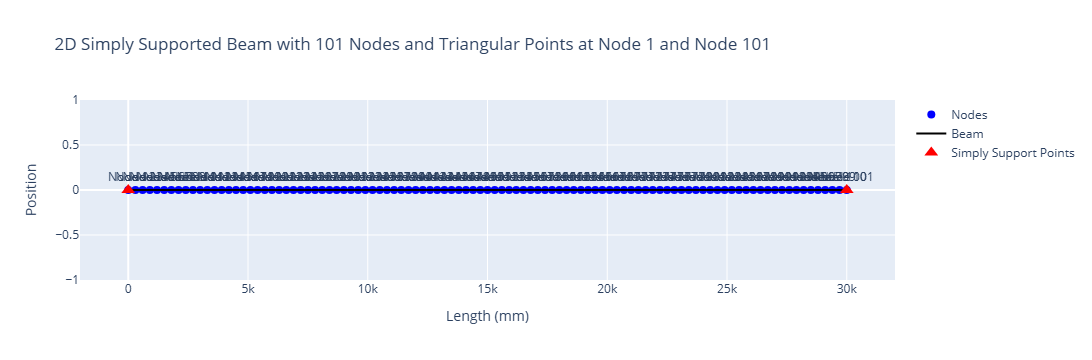

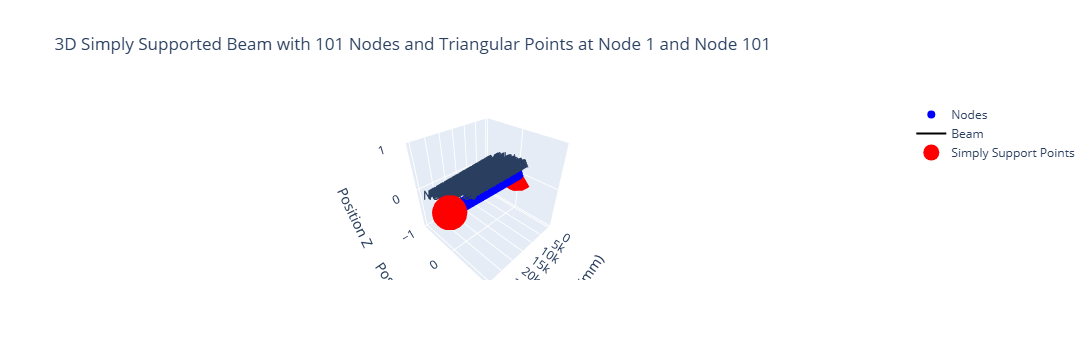

In [18]:
############################# 2D PLOT

# Number of nodes
num_nodes = 101

# Generate node positions
x = [(i-1) * Length / (num_nodes - 1) for i in range(1, num_nodes+1)]
y = [0] * num_nodes  # All nodes are on the x-axis

def PLOTLY_2D_BEAM(x, y, num_nodes, TITLE):
    import plotly.graph_objects as go
    # Create the plot
    fig = go.Figure()

    # Add nodes to the plot
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='markers+text',
        text=[f'Node {i}' for i in range(1, num_nodes+1)],
        textposition='top center',
        marker=dict(size=8, color='blue'),
        name='Nodes'
    ))

    # Add the beam line
    fig.add_trace(go.Scatter(
        x=[0, Length], y=[0, 0],
        mode='lines',
        line=dict(color='black', width=2),
        name='Beam'
    ))

    # Add triangular points at Node 1 and Node 101
    fig.add_trace(go.Scatter(
        x=[x[0], x[-1]], y=[y[0], y[-1]],
        mode='markers',
        marker=dict(size=12, symbol='triangle-up', color='red'),
        name='Simply Support Points'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title=TITLE,
        xaxis_title='Length (mm)',
        yaxis_title='Position',
        showlegend=True
    )

    # Show the plot
    fig.show()

############################# 3D PLOT

# Generate node positions
x = [(i-1) * Length / (num_nodes - 1) for i in range(1, num_nodes+1)]
y = [0] * num_nodes  # All nodes are on the x-axis
z = [0] * num_nodes  # All nodes are on the x-axis

def PLOTLY_3D_BEAM(x, y, z, num_nodes, TITLE):
    import plotly.graph_objects as go
    # Create the plot
    fig = go.Figure()

    # Add nodes to the plot
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers+text',
        text=[f'Node {i}' for i in range(1, num_nodes+1)],
        textposition='top center',
        marker=dict(size=8, color='blue'),
        name='Nodes'
    ))

    # Add the beam line
    fig.add_trace(go.Scatter3d(
        x=[0, Length], y=[0, 0], z=[0, 0],
        mode='lines',
        line=dict(color='black', width=2),
        name='Beam'
    ))

    # Add triangular points at Node 1 and Node 101
    fig.add_trace(go.Scatter3d(
        x=[x[0], x[-1]], y=[y[0], y[-1]], z=[z[0], z[-1]],
        mode='markers',
        marker=dict(size=20, color='red'),
        name='Simply Support Points'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title=TITLE,
        scene=dict(
            xaxis_title='Length (mm)',
            yaxis_title='Position Y',
            zaxis_title='Position Z'
        ),
        showlegend=True
    )

    # Show the plot
    fig.show()
#--------------------------------
PLOTLY_2D_BEAM(x, y, num_nodes, TITLE='2D Simply Supported Beam with 101 Nodes and Triangular Points at Node 1 and Node 101')     
PLOTLY_3D_BEAM(x, y, z, num_nodes, TITLE='3D Simply Supported Beam with 101 Nodes and Triangular Points at Node 1 and Node 101')


<Figure size 640x480 with 0 Axes>

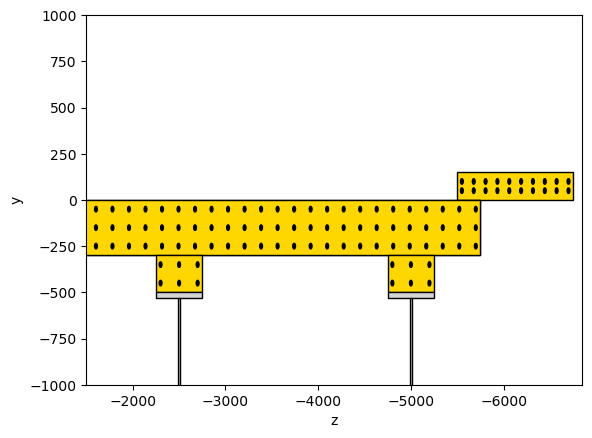

<Figure size 640x480 with 0 Axes>

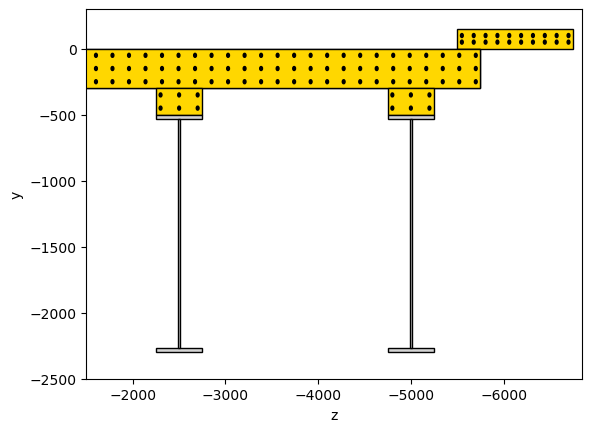

<Figure size 640x480 with 0 Axes>

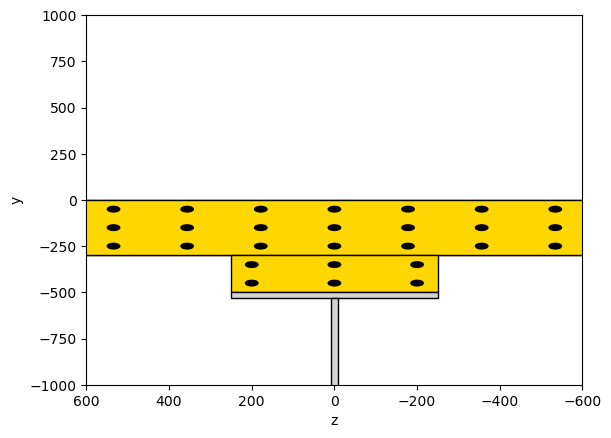

<Figure size 640x480 with 0 Axes>

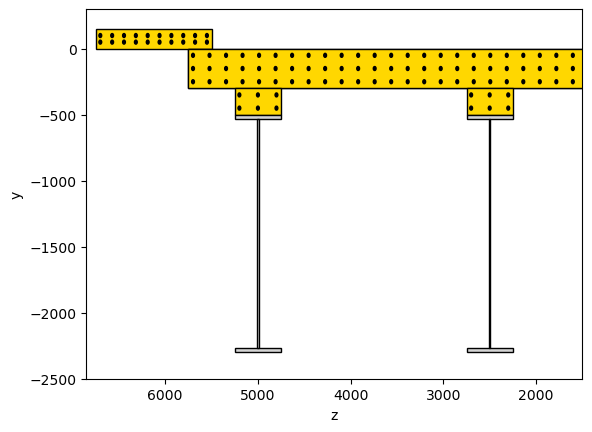

<Figure size 640x480 with 0 Axes>

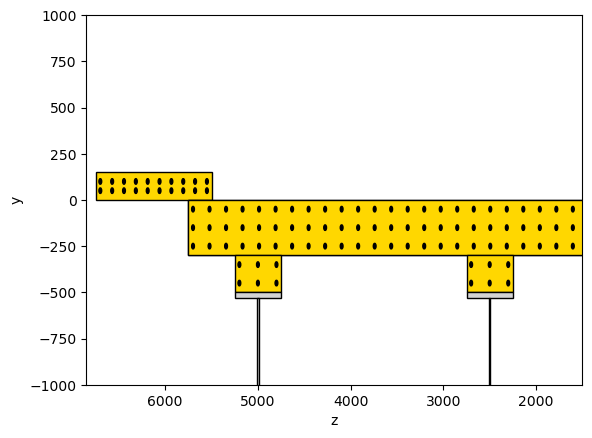

<Figure size 640x480 with 0 Axes>

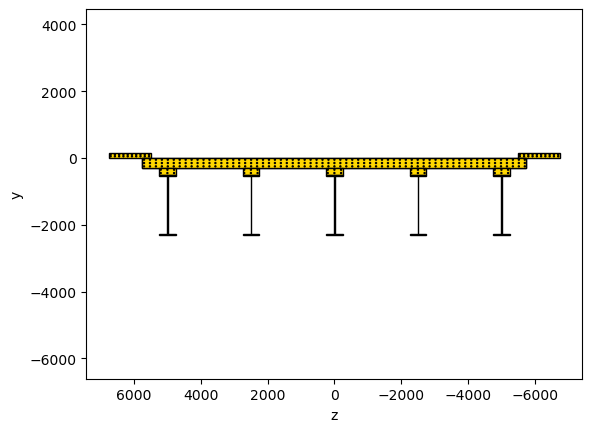

In [17]:
Section_Tag = 0
nFibZ = 1
nFibY = 1
PLOT = 1
OUTPUT = 'PUSH'
I = 0
d = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z,
                                 Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03, PLOT, OUTPUT, I)

In [17]:
# RUN MOMENT-CURVATURE ANLYSIS
Axial_Force = 0.0 # [N]
DR = 66.5 # Set Ductility Ratio for Moment Curvature
numIncr = 200# Number of analysis increments
TOLERANCE = 1e8 # Converganve Tolerance for Moment Curvature
MAX_ITERATION = 1000000 # Maximum Tolerance for Moment Curvature
MC_ANALYSIS(Axial_Force, DR, numIncr, TOLERANCE, MAX_ITERATION, J=0)

1 MC Done.


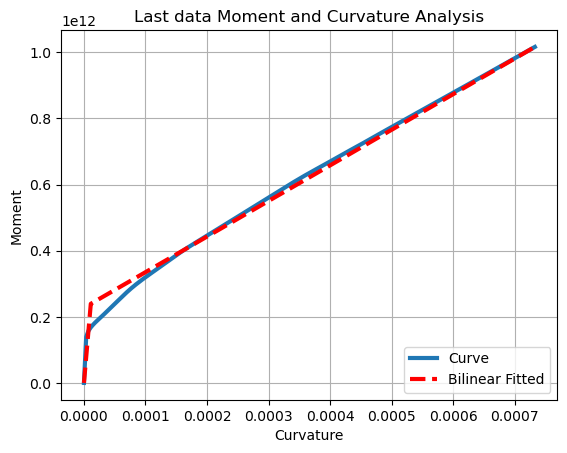

		 Ductility Ratio: 4.2472


In [18]:
CUR = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'CUR', 1, 0, 2)
MOM = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'MOM', 1, 0, 2)
xxc, yyc, _, _, _, _, _ = BILNEAR_CURVE(CUR, -MOM, 2)
xxc = np.abs(xxc); yyc = np.abs(yyc); # ABSOLUTE VALUE
XLABEL = 'Curvature'
YLABEL = 'Moment'
LEGEND01 = 'Curve'
LEGEND02 = 'Bilinear Fitted'
TITLE = 'Last data Moment and Curvature Analysis'
COLOR = 'black'
PLOT_2D(CUR, -MOM, xxc, yyc, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, _, COLOR='black', Z=2) 
print(f'\t\t Ductility Ratio: {yyc[2]/yyc[1]:.4f}')

In [26]:
### -----------------------------------------------------
###   Composite Bridge Superstructure Response Spectrum
### -----------------------------------------------------

g =  9810 # [mm/s^2] Acceleration due to Gravity

DMAX = -150 # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101 # NUMBER OF NODES IN BEAM ELEMENT
Kef = 433147.23743411334 # [N/mm] Structural Lateral Elastic Stiffness

DATA_FILE05 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\T.txt' #STRUCTURE PERIOD

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

NUM_ITERATION = 60
Tmax = 0.5 # Maximum Period 
Tdmax = Tmax / NUM_ITERATION
with open(DATA_FILE05, "w") as file:
    for i in range(NUM_ITERATION):
        T = (i+1) * Tdmax
        Massef = Kef * (T / (2*np.pi))**2
        PCol = Massef / 101 # Mass of each Node (Truss has 62 Nodes)
        PColw = PCol * g # Weight of each Node
        print(f'{i+1} MASS: {PCol:.5f} WEIGHT: {PColw:.5f}')
        PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      H, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, i)
        a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      H, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, i)
        file.write(f"{i+1} {T:.4f} {Massef:.4f}\n")
        print(f'Real Period: {a:.4f} - Period: {T:.4f}')
    
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")        

Current time (HH:MM:SS): 08:36:05


1 MASS: 0.00754 WEIGHT: 74.00498
Real Period: 0.5528 - Period: 0.0083
2 MASS: 0.03018 WEIGHT: 296.01993
Real Period: 0.5528 - Period: 0.0167
3 MASS: 0.06789 WEIGHT: 666.04483
Real Period: 0.5528 - Period: 0.0250
4 MASS: 0.12070 WEIGHT: 1184.07970
Real Period: 0.5528 - Period: 0.0333
5 MASS: 0.18860 WEIGHT: 1850.12453
Real Period: 0.5528 - Period: 0.0417
6 MASS: 0.27158 WEIGHT: 2664.17933
Real Period: 0.5528 - Period: 0.0500
7 MASS: 0.36965 WEIGHT: 3626.24409
Real Period: 0.5528 - Period: 0.0583
8 MASS: 0.48281 WEIGHT: 4736.31881
Real Period: 0.5528 - Period: 0.0667
9 MASS: 0.61105 WEIGHT: 5994.40349
Real Period: 0.5528 - Period: 0.0750
10 MASS: 0.75438 WEIGHT: 7400.49814
Real Period: 0.5528 - Period: 0.0833
11 MASS: 0.91280 WEIGHT: 8954.60275
Real Period: 0.5528 - Period: 0.0917
12 MASS: 1.08631 WEIGHT: 10656.71732
Real Period: 0.5528 - Period: 0.1000
13 MASS: 1.27491 WEIGHT: 12506.84185
Real Period: 0.5528 - Period: 0.1083
14 MASS: 1.47859 WEIGHT: 1

In [27]:
# Evaluation for Last Data for Difference ‌Between Real Period and Simple Linear Analysis Period
print(f'Real Period: {a:.10f} - Period: {T:.10f}')
print(a/T - 1)
print(Kef * T/a)

Real Period: 0.5528352950 - Period: 0.5000000000
0.10567059008169566
391750.70886357664


In [19]:
## FILE ADDRESS
DATA_FILE01 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MD'  # DISPLACEMENT TIME HISTORY
DATA_FILE02 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MV'  # VELOCITY TIME HISTORY
DATA_FILE03 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MA'  # ACCELERATION TIME HISTORY

DATA_FILE04 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_nodeDisplacements'  # NODE DISPLACEMENT - PUSH
DATA_FILE05 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_elementForces'  # ELEMENT FORCE - PUSH
DATA_FILE06 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_fiber_StressStrain'  # SECTION STRAIN-STRESS - PUSH

DATA_FILE07 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_nodeDisplacements'  # NODE DISPLACEMENT - DYN
DATA_FILE08 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_elementForces'  # ELEMENT FORCE - DYN
DATA_FILE09 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_fiber_StressStrain'  # SECTION STRAIN-STRESS - DYN

DATA_FILE10 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DEF_PUSH'  # DEFORMATION TIME HISTORY - PUSH
DATA_FILE11 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DEF_DYN'  # DEFORMATION TIME HISTORY - DYN

In [20]:
### LOAD OUTPUT DATAS

import numpy as np
filename = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\T.txt'
data = np.loadtxt(filename)
T = data[:, 1] # PERIOD
mass = data[:, 2] # MASS

pgd = [] # Peak Displacement 
pgv = [] # Peak Velocity
pga = [] # Peak Acceleration
pgb = [] # Base shear during dynamic
period = []
nf = [] # natural frequency

diS = [] # Structure Ductility Damage Index
diC = [] # Section Ductility Damage Index
momr = [] # Resistance Moment Capacity from Moment Curvature Analysis
moml = [] # Applied Moment from Dynamic Analysis
bDbP = [] # Ratio Base-shear Dynamic to Base-shear Pushover
dDdP = [] # Ratio Displacement Dynamic to Displacement Pushover

diASP01 = [] # Steel Plate Axial Ductility Damage Index 01
diASP02 = [] # Steel Plate Axial Ductility Damage Index 02

diAS01 = [] # Steel Rebar Axial Ductility Damage Index 01
diAS02 = [] # Steel Rebar Axial Ductility Damage Index 02
diAS03 = [] # Steel Rebar Axial Ductility Damage Index 03
diAS04 = [] # Steel Rebar Axial Ductility Damage Index 04
diAS05 = [] # Steel Rebar Axial Ductility Damage Index 05

diAC01 = [] # Concrete Axial Ductility Damage Index 01
diAC02 = [] # Concrete Axial Ductility Damage Index 02
diAC03 = [] # Concrete Axial Ductility Damage Index 03

Dyn_fiber_C_Strain01 = [] # Concrete Fiber Strain 01 - DYN
Dyn_fiber_C_Strain02 = [] # Concrete Fiber Strain 02 - DYN
Dyn_fiber_C_Strain03 = [] # Concrete Fiber Strain 03 - DYN
Dyn_fiber_C_Stress01 = [] # Concrete Fiber Stress 01 - DYN
Dyn_fiber_C_Stress02 = [] # Concrete Fiber Stress 02 - DYN
Dyn_fiber_C_Stress03 = [] # Concrete Fiber Stress 03 - DYN

Dyn_fiber_R_Strain01 = [] # Steel Rebar Fiber Strain 01 - DYN
Dyn_fiber_R_Strain02 = [] # Steel Rebar Fiber Strain 02 - DYN
Dyn_fiber_R_Strain03 = [] # Steel Rebar Fiber Strain 03 - DYN
Dyn_fiber_R_Strain04 = [] # Steel Rebar Fiber Strain 04 - DYN
Dyn_fiber_R_Strain05 = [] # Steel Rebar Fiber Strain 05 - DYN
Dyn_fiber_R_Stress01 = [] # Steel Rebar Fiber Stress 01 - DYN
Dyn_fiber_R_Stress02 = [] # Steel Rebar Fiber Stress 02 - DYN
Dyn_fiber_R_Stress03 = [] # Steel Rebar Fiber Stress 03 - DYN
Dyn_fiber_R_Stress04 = [] # Steel Rebar Fiber Stress 04 - DYN
Dyn_fiber_R_Stress05 = [] # Steel Rebar Fiber Stress 05 - DYN

Dyn_fiber_P_Strain01 = [] # Steel Plate Fiber Strain 01 - DYN
Dyn_fiber_P_Strain02 = [] # Steel Plate Fiber Strain 02 - DYN
Dyn_fiber_P_Stress01 = [] # Steel Plate Fiber Stress 01 - DYN
Dyn_fiber_P_Stress02 = [] # Steel Plate Fiber Stress 02 - DYN

cur = [] # Curvature of Node 50
osf = [] # Over Strength Factor of Structure
dr = []  # Ductility Ratio of Structure
eei = [] # Elastic Flexural rigidity of Structure
pei = [] # Plastic Flexural rigidity of Structure
yd = [] # Yield Displacement of Structure
yb = [] # Yield Base-sheaer of Structure
ud = [] # Utilamte Displacement of Structure
ub = [] # Utilamte Base-sheaer of Structure

DMAX = -150 # [mm] Max. Pushover Incremental Displacement

ysp_strain = 0.0018 # Yield strain - STEEL PLATE
usp_strain = 0.1  # Ultimate strain - STEEL PLATE

ys_strain = 0.02 # Yield strain - STEEL REBAR
us_strain = 0.1  # Ultimate strain - STEEL REBAR

yc_strain = 0.0002 # Yield strain - CONFINED CONCRETE
uc_strain = 0.008  # Ultimate strain -  CONFINED CONCRETE

# Number of nodes
num_nodes = 101

NUM_ITERATION = 60
for i in range(NUM_ITERATION):
    period.append(T[i])
    nf.append(1/T[i])
    pgd.append(MAXABS_FUN(DATA_FILE01, 1, i, _, 1))# MAX ABS DISPLACEMENT OF NODE 16
    pgv.append(MAXABS_FUN(DATA_FILE02, 1, i, _, 1))# MAX ABS VELOCITY OF NODE 16
    pga.append(MAXABS_FUN(DATA_FILE03, 1, i, _, 1))# MAX ABS ACCELERATION OF NODE 16
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_01', 2, i, 2) # Reading base shear from Text file - DYNAMIC - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_101', 2, i, 2) # Reading base shear from Text file - DYNAMIC - NODE 101
    baseD = max(abs(base01 + base02))
    pgb.append(baseD)
    # STRUCTURE DUCTILITY DAMAGE INDEX
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2) # Reading Disp from Text file - PUSHOVER
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 101
    dispP = np.abs(dispP); baseP = np.abs(base01 + base02); # ABSOLUTE VALUE
    bDbP.append(pgb[-1] / max(baseP))
    dDdP.append(pgd[-1] / max(dispP))
    xx, yy, Elastic_EI, Plastic_EI, Tangent_EI, Ductility_Rito, Over_Stregth_Factor = BILNEAR_CURVE(dispP, baseP, 30) 
    xx = np.abs(xx); yy = np.abs(yy) # ABSOLUTE VALUE
    osf.append(Over_Stregth_Factor)
    dr.append(Ductility_Rito)
    pei.append(Plastic_EI)
    eei.append(Elastic_EI)
    yd.append(xx[1])
    yb.append(yy[1])
    ud.append(xx[2])
    ub.append(yy[2])
    demand_disp = MAXABS_FUN(DATA_FILE01, 1, i, _, 1)# DISPLACEMENT DYNAMIC ANALYSIS
    DIs = (demand_disp - xx[1]) / (xx[2] - xx[1])
    #DIs = (demand_disp - xx[1]) / (abs(DMAX) - xx[1]) # IF xx[2] MORE THAN DMAX YOU MUST USE THIS 
    diS.append(DIs)
    # SECTION DUCTILITY DAMAGE INDEX
    DEMAND_CURVATURE = MAXABS_FUN(DATA_FILE11, 1, i, _, 1)# CURVATURE DYNAMIC ANALYSIS
    DIc = (DEMAND_CURVATURE - xxc[1]) / (xxc[2] - xxc[1]) # Target Section Ductility Damage Index
    diC.append(DIc)
    # AXIAL DUCTILITY DAMAGE INDEX - CONCRETE
    DEMAND_STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberCon_StressStrain_01', 1, i, 2)))
    DEMAND_STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberCon_StressStrain_01', 0, i, 2)))
    Dyn_fiber_C_Strain01.append(DEMAND_STRAIN)
    Dyn_fiber_C_Stress01.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Concrete Fiber 01
    diAC01.append(DI_AXIAL)
    DEMAND_STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberCon_StressStrain_02', 1, i, 2)))
    DEMAND_STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberCon_StressStrain_02', 0, i, 2)))
    Dyn_fiber_C_Strain02.append(DEMAND_STRAIN)
    Dyn_fiber_C_Stress02.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Steel Rebar Fiber 02
    diAC02.append(DI_AXIAL)
    DEMAND_STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberCon_StressStrain_03', 1, i, 2)))
    DEMAND_STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberCon_StressStrain_03', 0, i, 2)))
    Dyn_fiber_C_Strain03.append(DEMAND_STRAIN)
    Dyn_fiber_C_Stress03.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Steel Rebar Fiber 03
    diAC03.append(DI_AXIAL)
    # AXIAL DUCTILITY DAMAGE INDEX - REBAR
    DEMAND_STRAIN = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberReb_StressStrain_01', 1, i, 2)))
    DEMAND_STRESS = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberReb_StressStrain_01', 0, i, 2)))
    Dyn_fiber_R_Strain01.append(DEMAND_STRAIN)
    Dyn_fiber_R_Stress01.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Steel Rebar Fiber 01
    diAS01.append(DI_AXIAL)
    DEMAND_STRAIN = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_02', 1, i, 2)))
    DEMAND_STRESS = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_02', 0, i, 2)))
    Dyn_fiber_R_Strain02.append(DEMAND_STRAIN)
    Dyn_fiber_R_Stress02.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Steel Rebar Fiber 02
    diAS02.append(DI_AXIAL)
    DEMAND_STRAIN = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_03', 1, i, 2)))
    DEMAND_STRESS = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_03', 0, i, 2)))
    Dyn_fiber_R_Strain03.append(DEMAND_STRAIN)
    Dyn_fiber_R_Stress03.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Steel Rebar Fiber 03
    diAS03.append(DI_AXIAL)
    DEMAND_STRAIN = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_04', 1, i, 2)))
    DEMAND_STRESS = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_04', 0, i, 2)))
    Dyn_fiber_R_Strain04.append(DEMAND_STRAIN)
    Dyn_fiber_R_Stress04.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Steel Rebar Fiber 04
    diAS04.append(DI_AXIAL)
    DEMAND_STRAIN = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_05', 1, i, 2)))
    DEMAND_STRESS = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'DYN_fiberReb_StressStrain_05', 0, i, 2)))
    Dyn_fiber_R_Strain05.append(DEMAND_STRAIN)
    Dyn_fiber_R_Stress05.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ys_strain) / (us_strain - ys_strain)# Axial Ductility Damage Index for Steel Rebar Fiber 05
    diAS05.append(DI_AXIAL)
    # AXIAL DUCTILITY DAMAGE INDEX - PLATE
    DEMAND_STRAIN = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberPlate_StressStrain_01', 1, i, 2)))
    DEMAND_STRESS = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberPlate_StressStrain_01', 0, i, 2)))
    Dyn_fiber_P_Strain01.append(DEMAND_STRAIN)
    Dyn_fiber_P_Stress01.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ysp_strain) / (usp_strain - ysp_strain)# Axial Ductility Damage Index for Steel Plate Fiber
    diASP01.append(DI_AXIAL)
    DEMAND_STRAIN = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberPlate_StressStrain_02', 1, i, 2)))
    DEMAND_STRESS = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DYN_fiberPlate_StressStrain_02', 0, i, 2)))
    Dyn_fiber_P_Strain02.append(DEMAND_STRAIN)
    Dyn_fiber_P_Stress02.append(DEMAND_STRESS)
    DI_AXIAL = (DEMAND_STRAIN - ysp_strain) / (usp_strain - ysp_strain)# Axial Ductility Damage Index for Steel Plate Fiber
    diASP02.append(DI_AXIAL)  
    print(f'{i+1} T: {period[-1]:.5e} MASS: {mass[i]:.5e} pgd: {pgd[-1]:.5e} pgv: {pgv[-1]:.5e} pga: {pga[-1]:.5e} pgb: {pgb[-1]:.5e}')

    


1 T: 8.30000e-03 MASS: 7.61900e-01 pgd: 2.24494e-02 pgv: 2.50114e-06 pga: 4.92117e-04 pgb: 7.47454e+03
2 T: 1.67000e-02 MASS: 3.04770e+00 pgd: 8.97976e-02 pgv: 1.00857e-05 pga: 1.21218e-03 pgb: 2.98982e+04
3 T: 2.50000e-02 MASS: 6.85730e+00 pgd: 2.02045e-01 pgv: 2.30322e-05 pga: 1.82770e-03 pgb: 6.72708e+04
4 T: 3.33000e-02 MASS: 1.21908e+01 pgd: 3.59192e-01 pgv: 4.30087e-05 pga: 2.29455e-03 pgb: 1.19592e+05
5 T: 4.17000e-02 MASS: 1.90482e+01 pgd: 5.61239e-01 pgv: 6.87335e-05 pga: 3.67122e-03 pgb: 1.86863e+05
6 T: 5.00000e-02 MASS: 2.74294e+01 pgd: 8.08188e-01 pgv: 1.14704e-04 pga: 7.99166e-03 pgb: 2.69084e+05
7 T: 5.83000e-02 MASS: 3.73344e+01 pgd: 1.10004e+00 pgv: 1.63011e-04 pga: 1.12122e-02 pgb: 3.66252e+05
8 T: 6.67000e-02 MASS: 4.87633e+01 pgd: 1.43679e+00 pgv: 3.26684e-04 pga: 2.40896e-02 pgb: 4.78370e+05
9 T: 7.50000e-02 MASS: 6.17161e+01 pgd: 1.81845e+00 pgv: 4.98026e-04 pga: 3.52245e-02 pgb: 6.05438e+05
10 T: 8.33000e-02 MASS: 7.61927e+01 pgd: 2.24501e+00 pgv: 6.46942e-04 pga

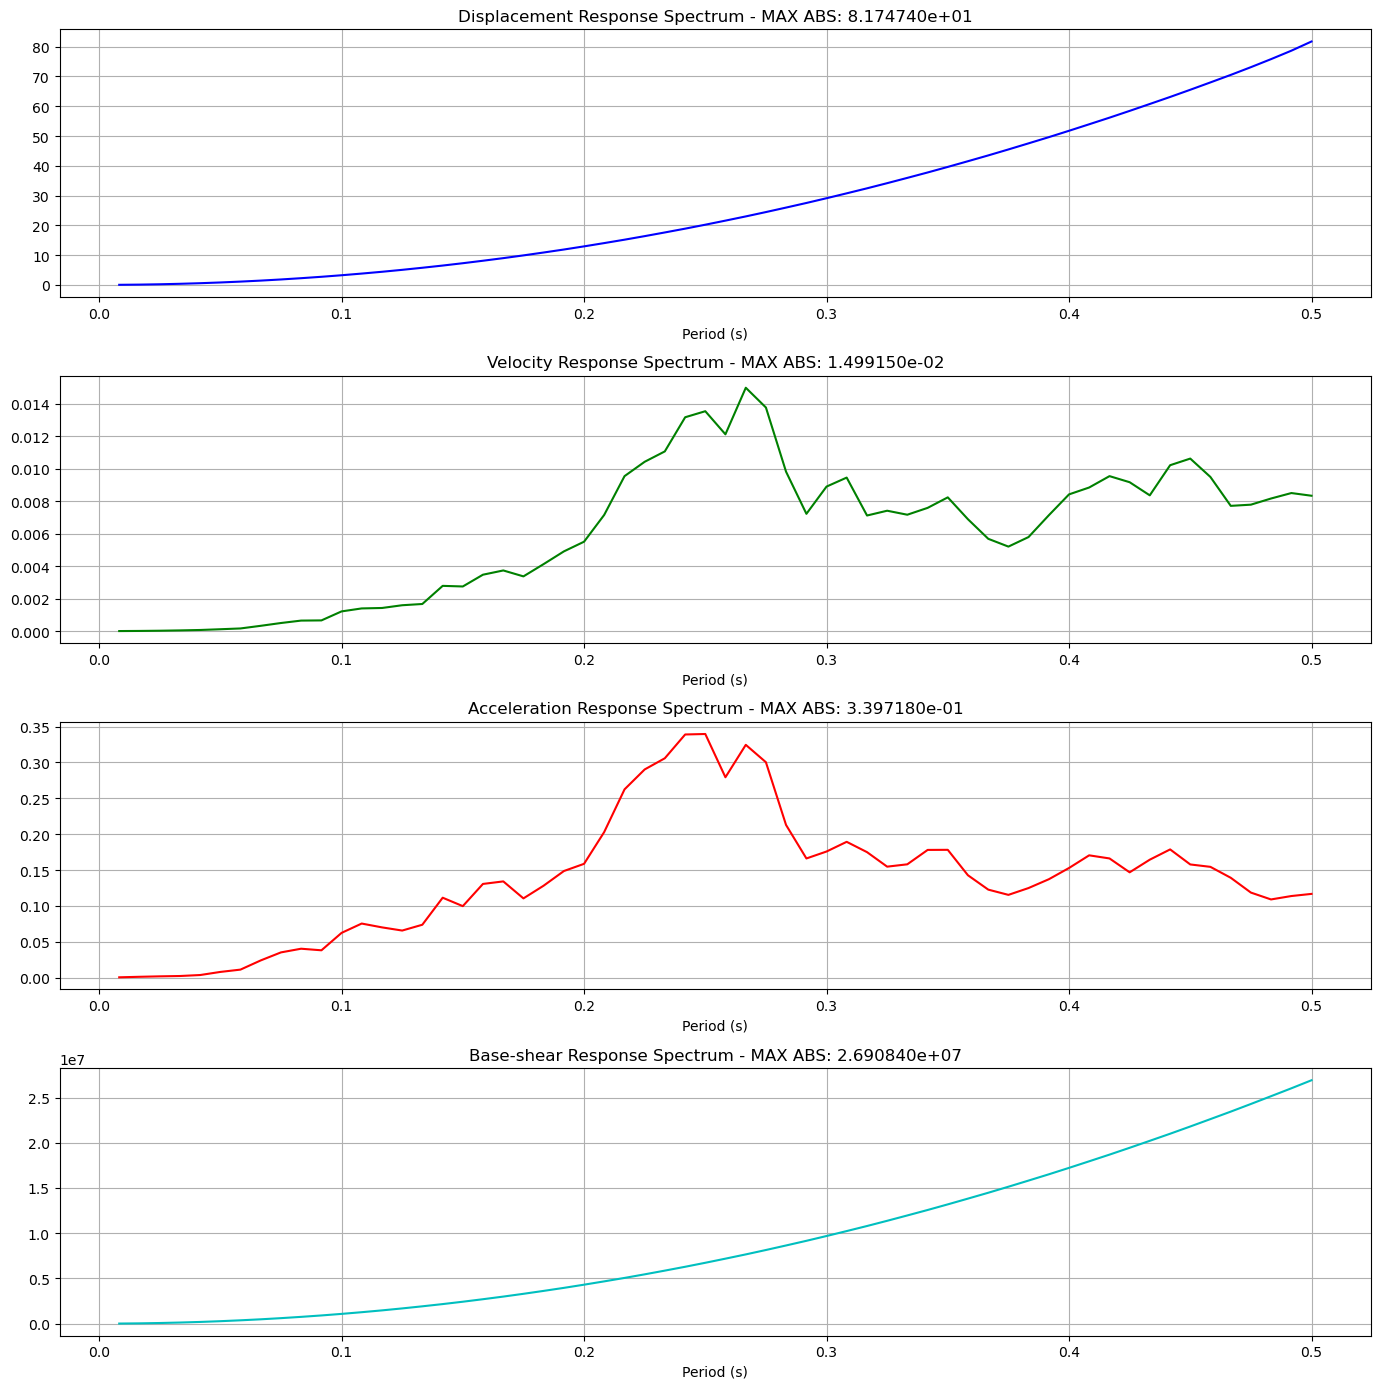

In [25]:
xlabel = 'Period (s)'
y1label = 'Displacement Response Spectrum'
y2label = 'Velocity Response Spectrum'
y3label = 'Acceleration Response Spectrum'
y4label = 'Base-shear Response Spectrum'
PLOT_TIME_HIS(period, xlabel, pgd, y1label, pgv, y2label, pga, y3label, pgb, y4label, Z=4, LOGX=0, LOGY=0)

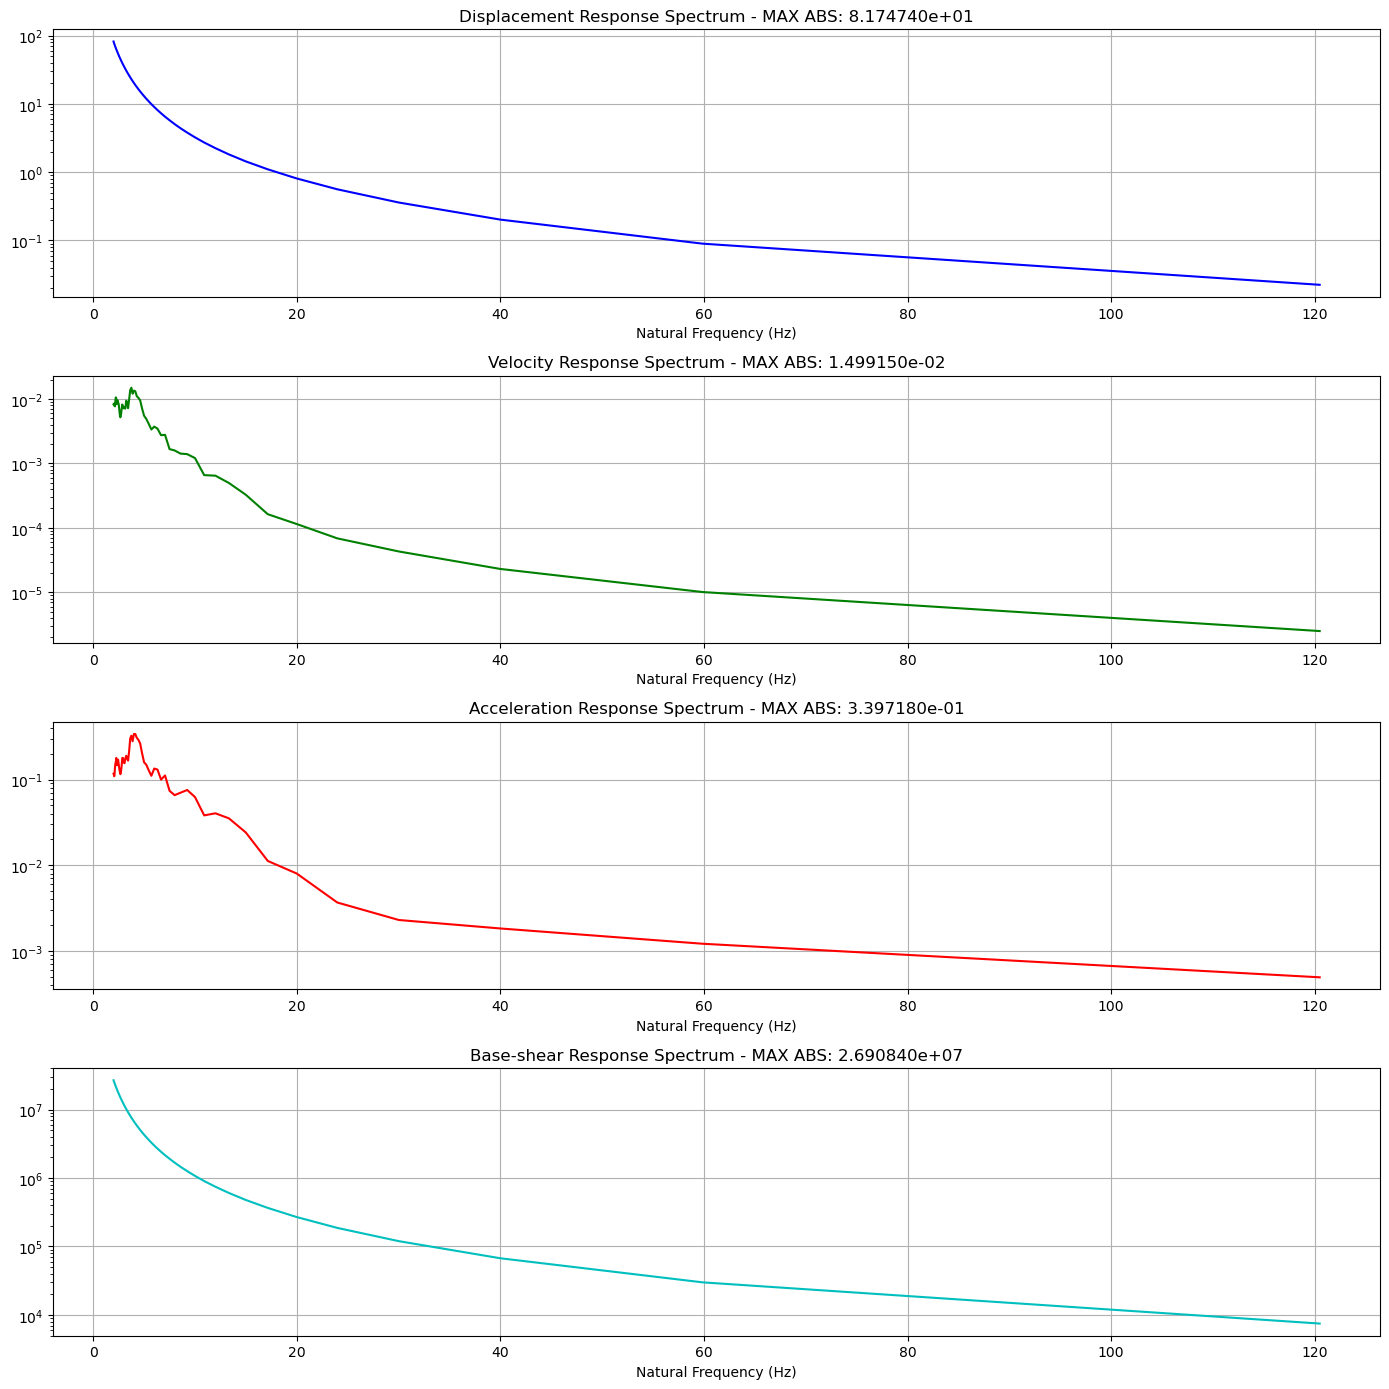

In [26]:
xlabel = 'Natural Frequency (Hz)'
y1label = 'Displacement Response Spectrum'
y2label = 'Velocity Response Spectrum'
y3label = 'Acceleration Response Spectrum'
y4label = 'Base-shear Response Spectrum'
PLOT_TIME_HIS(nf, xlabel, pgd, y1label, pgv, y2label, pga, y3label, pgb, y4label, Z=4, LOGX=0, LOGY=1)

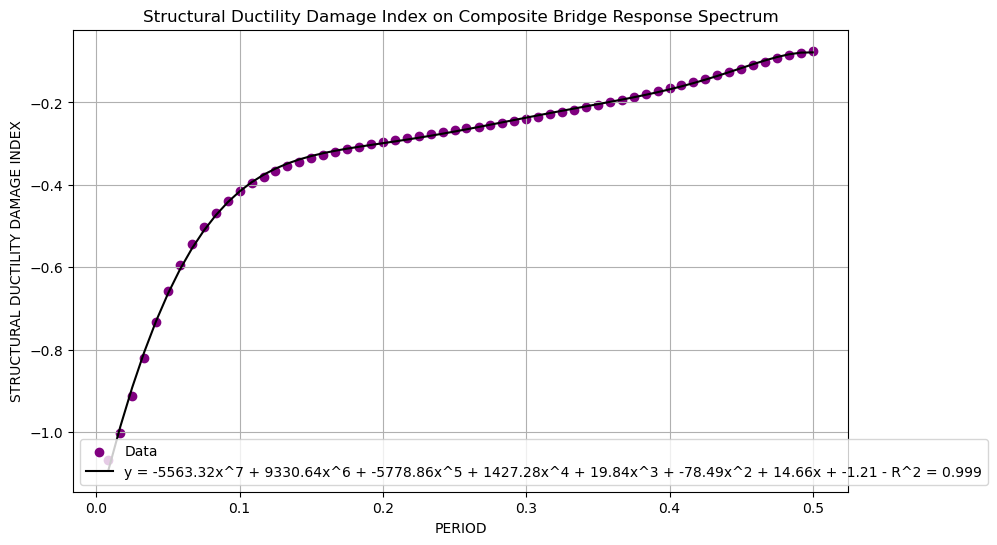

In [27]:
# Data usage
X = period
Y = diS
XLABEL = 'PERIOD'
YLABEL = 'STRUCTURAL DUCTILITY DAMAGE INDEX'
TITLE = 'Structural Ductility Damage Index on Composite Bridge Response Spectrum'
LABELS = 'DI'
COLOR='purple'

PLOT_SCATTER(period, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(period, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

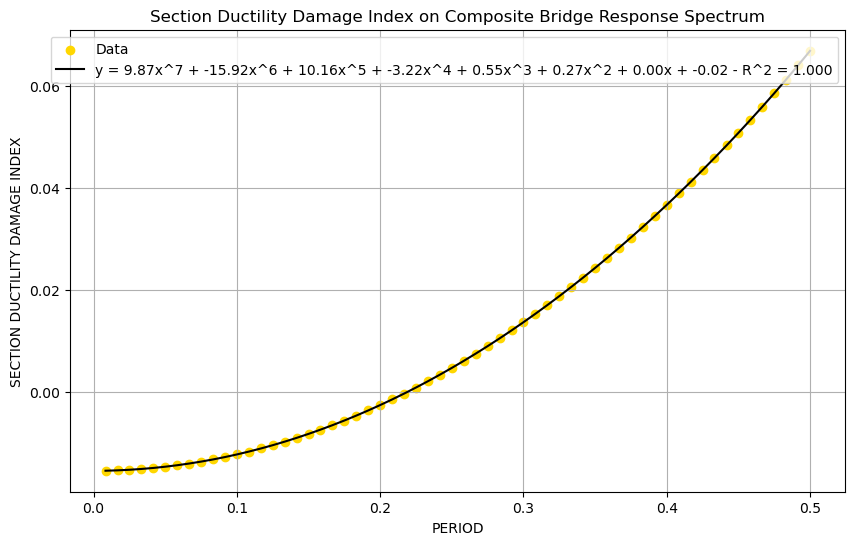

In [28]:
# Data usage
XLABEL = 'PERIOD'
YLABEL = 'SECTION DUCTILITY DAMAGE INDEX'
TITLE = 'Section Ductility Damage Index on Composite Bridge Response Spectrum'
LABELS = 'DI'
COLOR='gold'

PLOT_SCATTER(period, diC, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(period, diC, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

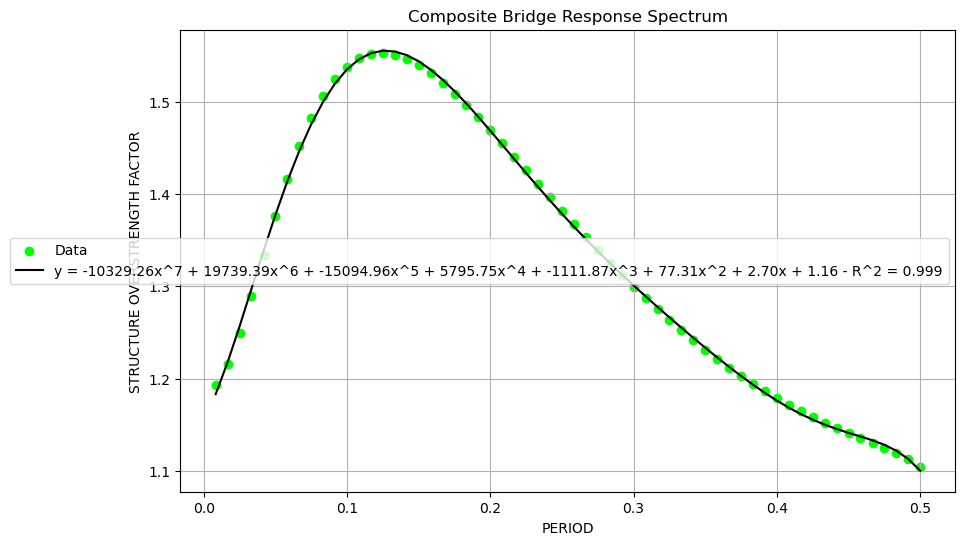

In [29]:
XLABEL = 'PERIOD'
YLABEL = 'STRUCTURE OVERSTRENGTH FACTOR'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'lime'

PLOT_SCATTER(period, osf, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(period, osf, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

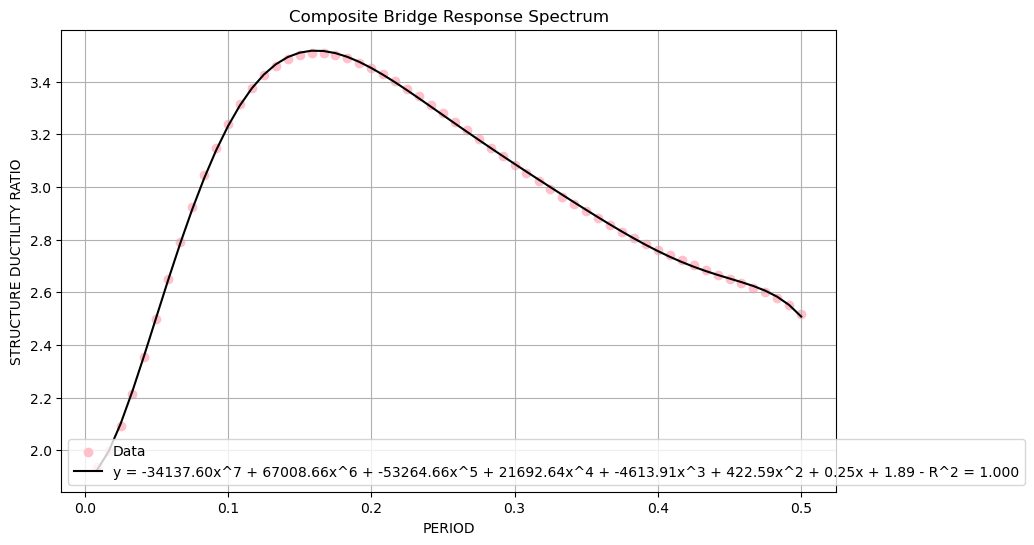

In [30]:
XLABEL = 'PERIOD'
YLABEL = 'STRUCTURE DUCTILITY RATIO'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'pink'

PLOT_SCATTER(period, dr, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(period, dr, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

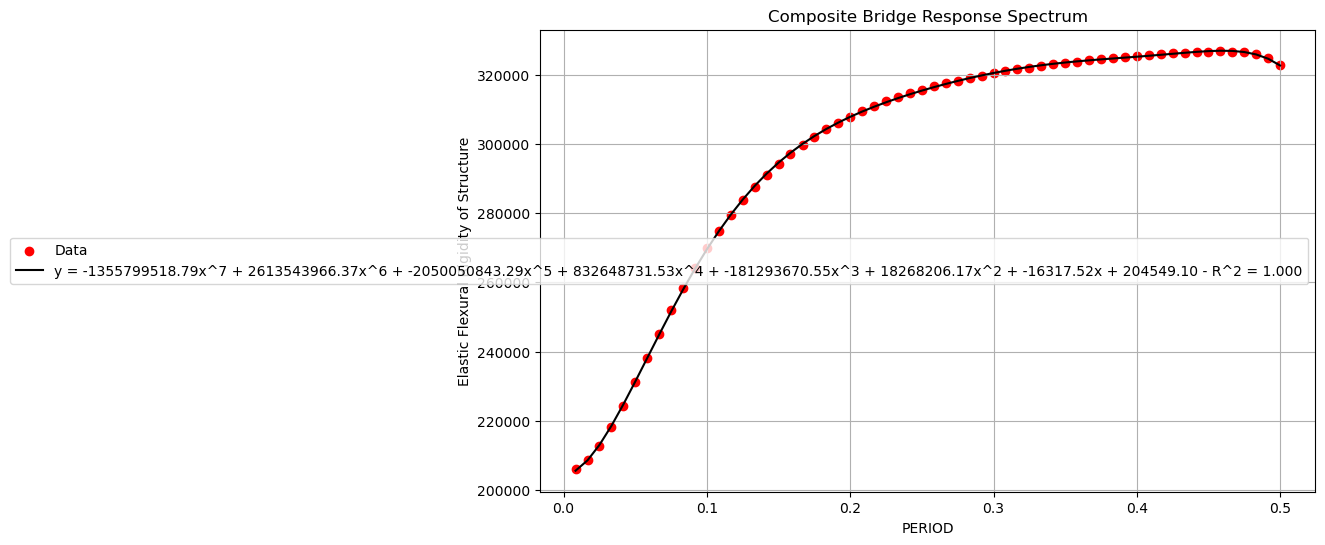

In [31]:
XLABEL = 'PERIOD'
YLABEL = 'Elastic Flexural Rigidity of Structure'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'red'

PLOT_SCATTER(period, eei, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(period, eei, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

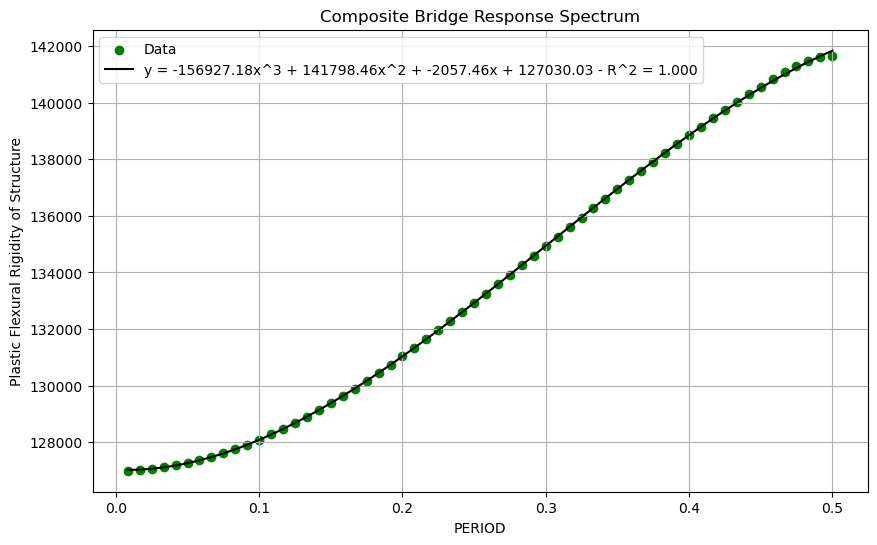

In [32]:
XLABEL = 'PERIOD'
YLABEL = 'Plastic Flexural Rigidity of Structure'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'green'

PLOT_SCATTER(period, pei, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 3) 
#PLOT_SCATTER_PLOTLY(period, pei, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 3)

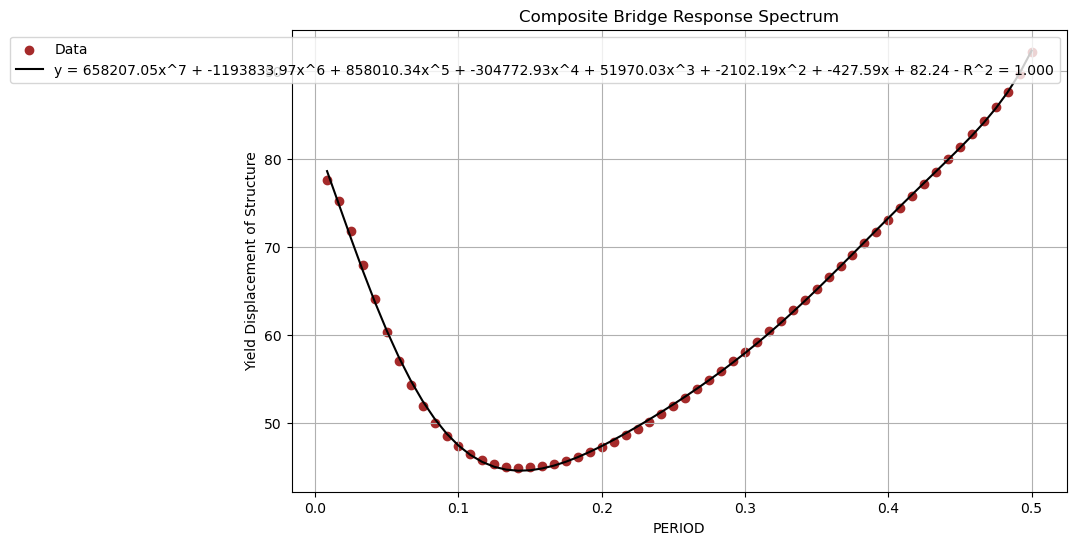

In [33]:
XLABEL = 'PERIOD'
YLABEL = 'Yield Displacement of Structure'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'brown'

PLOT_SCATTER(period, yd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(period, yd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

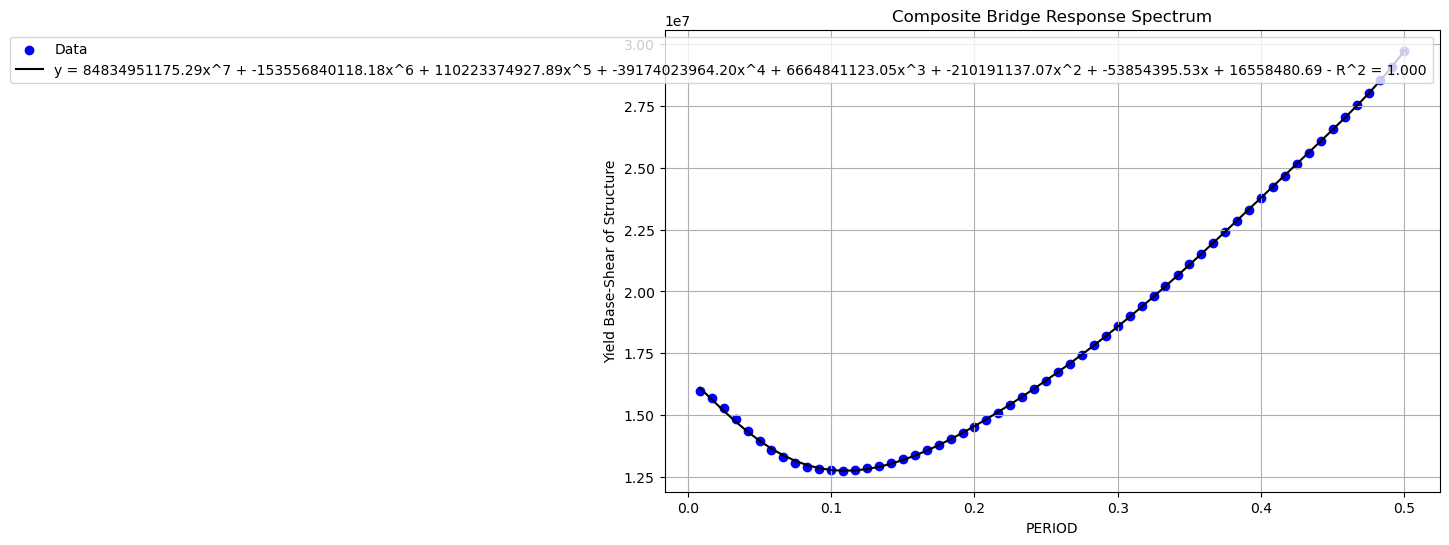

In [34]:
XLABEL = 'PERIOD'
YLABEL = 'Yield Base-Shear of Structure'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'blue'

PLOT_SCATTER(period, yb, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(period, yb, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

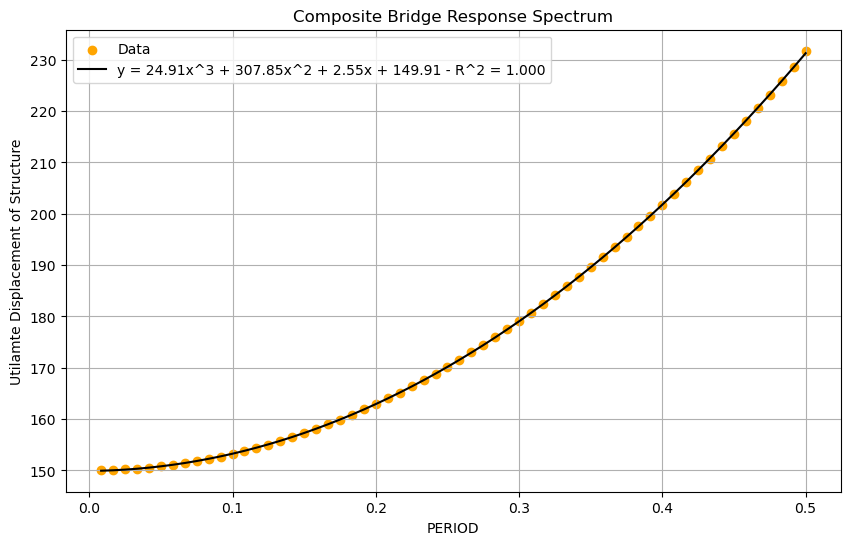

In [35]:
XLABEL = 'PERIOD'
YLABEL = 'Utilamte Displacement of Structure'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'orange'

PLOT_SCATTER(period, ud, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 3) 
#PLOT_SCATTER_PLOTLY(period, ud, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 3)

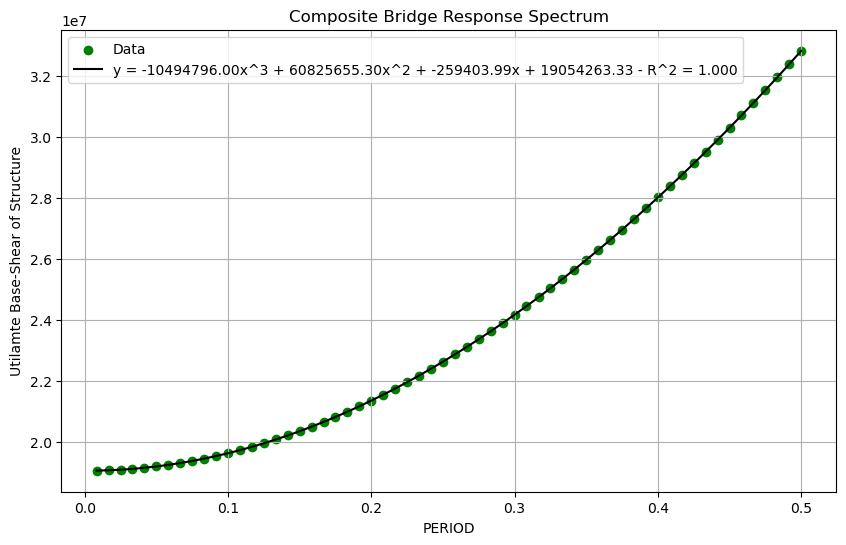

In [36]:
XLABEL = 'PERIOD'
YLABEL = 'Utilamte Base-Shear of Structure'
TITLE = 'Composite Bridge Response Spectrum'
COLOR = 'green'

PLOT_SCATTER(period, ub, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 3) 
#PLOT_SCATTER_PLOTLY(period, ub, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 3)

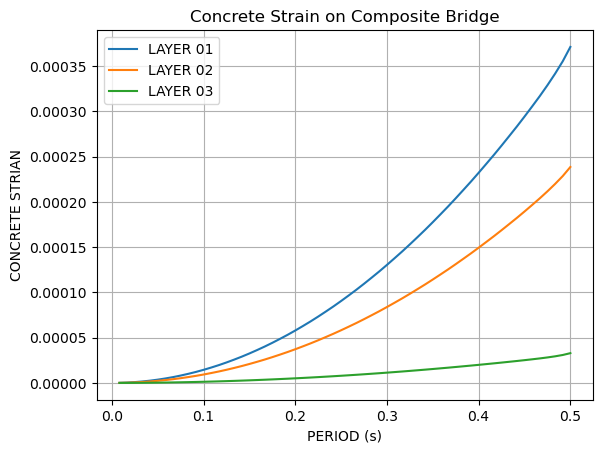

In [37]:
# Data usage
x = period
y_list = [
    Dyn_fiber_C_Strain01,
    Dyn_fiber_C_Strain02,
    Dyn_fiber_C_Strain03,

]

XLABEL = 'PERIOD (s)'
YLABEL = 'CONCRETE STRIAN'
TITLE = 'Concrete Strain on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02','LAYER 03']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

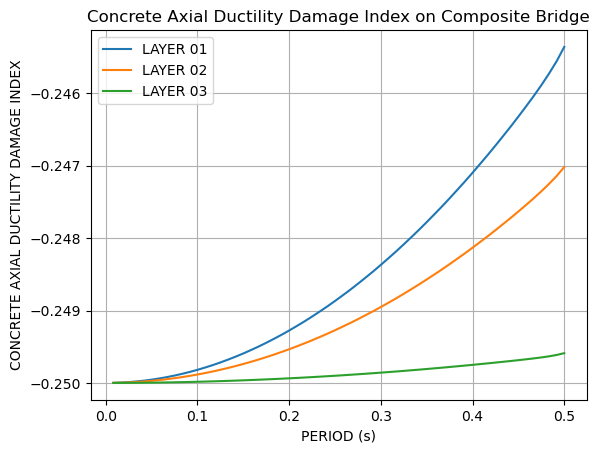

In [38]:
# Data usage
x = period
y_list = [
    diAC01,
    diAC02,
    diAC03,

]

XLABEL = 'PERIOD (s)'
YLABEL = 'CONCRETE AXIAL DUCTILITY DAMAGE INDEX'
TITLE = 'Concrete Axial Ductility Damage Index on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02','LAYER 03']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

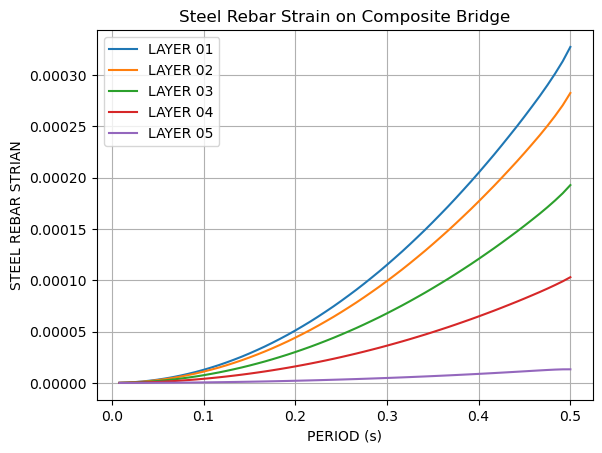

In [39]:
# Data usage
x = period
y_list = [
    Dyn_fiber_R_Strain01,
    Dyn_fiber_R_Strain02,
    Dyn_fiber_R_Strain03,
    Dyn_fiber_R_Strain04,
    Dyn_fiber_R_Strain05,

]

XLABEL = 'PERIOD (s)'
YLABEL = 'STEEL REBAR STRIAN'
TITLE = 'Steel Rebar Strain on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02','LAYER 03', 'LAYER 04', 'LAYER 05']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

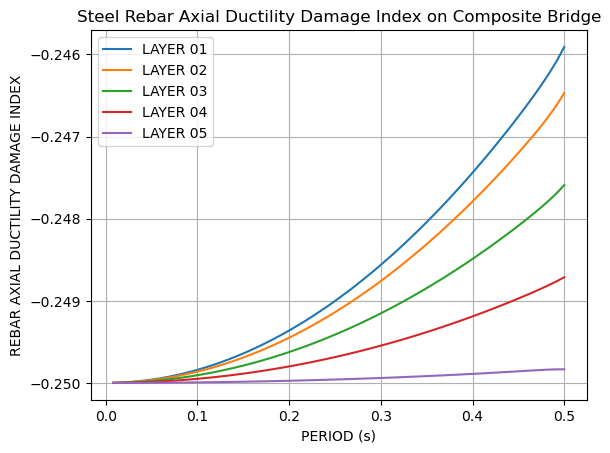

In [40]:
# Data usage
x = period
y_list = [
    diAS01,
    diAS02,
    diAS03,
    diAS04, 
    diAS05
]

XLABEL = 'PERIOD (s)'
YLABEL = 'REBAR AXIAL DUCTILITY DAMAGE INDEX'
TITLE = 'Steel Rebar Axial Ductility Damage Index on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02','LAYER 03', 'LAYER 04', 'LAYER 05']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

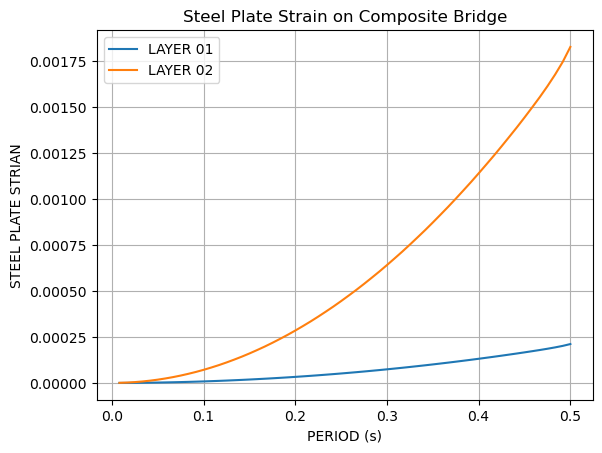

In [41]:
# Data usage
x = period
y_list = [
    Dyn_fiber_P_Strain01,
    Dyn_fiber_P_Strain02,
]

XLABEL = 'PERIOD (s)'
YLABEL = 'STEEL PLATE STRIAN'
TITLE = 'Steel Plate Strain on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

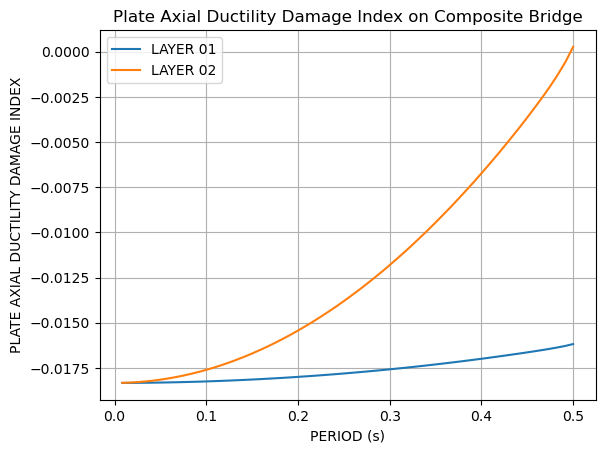

In [42]:
# Data usage
x = period
y_list = [
    diASP01,
    diASP02,

]

XLABEL = 'PERIOD (s)'
YLABEL = 'PLATE AXIAL DUCTILITY DAMAGE INDEX'
TITLE = 'Plate Axial Ductility Damage Index on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

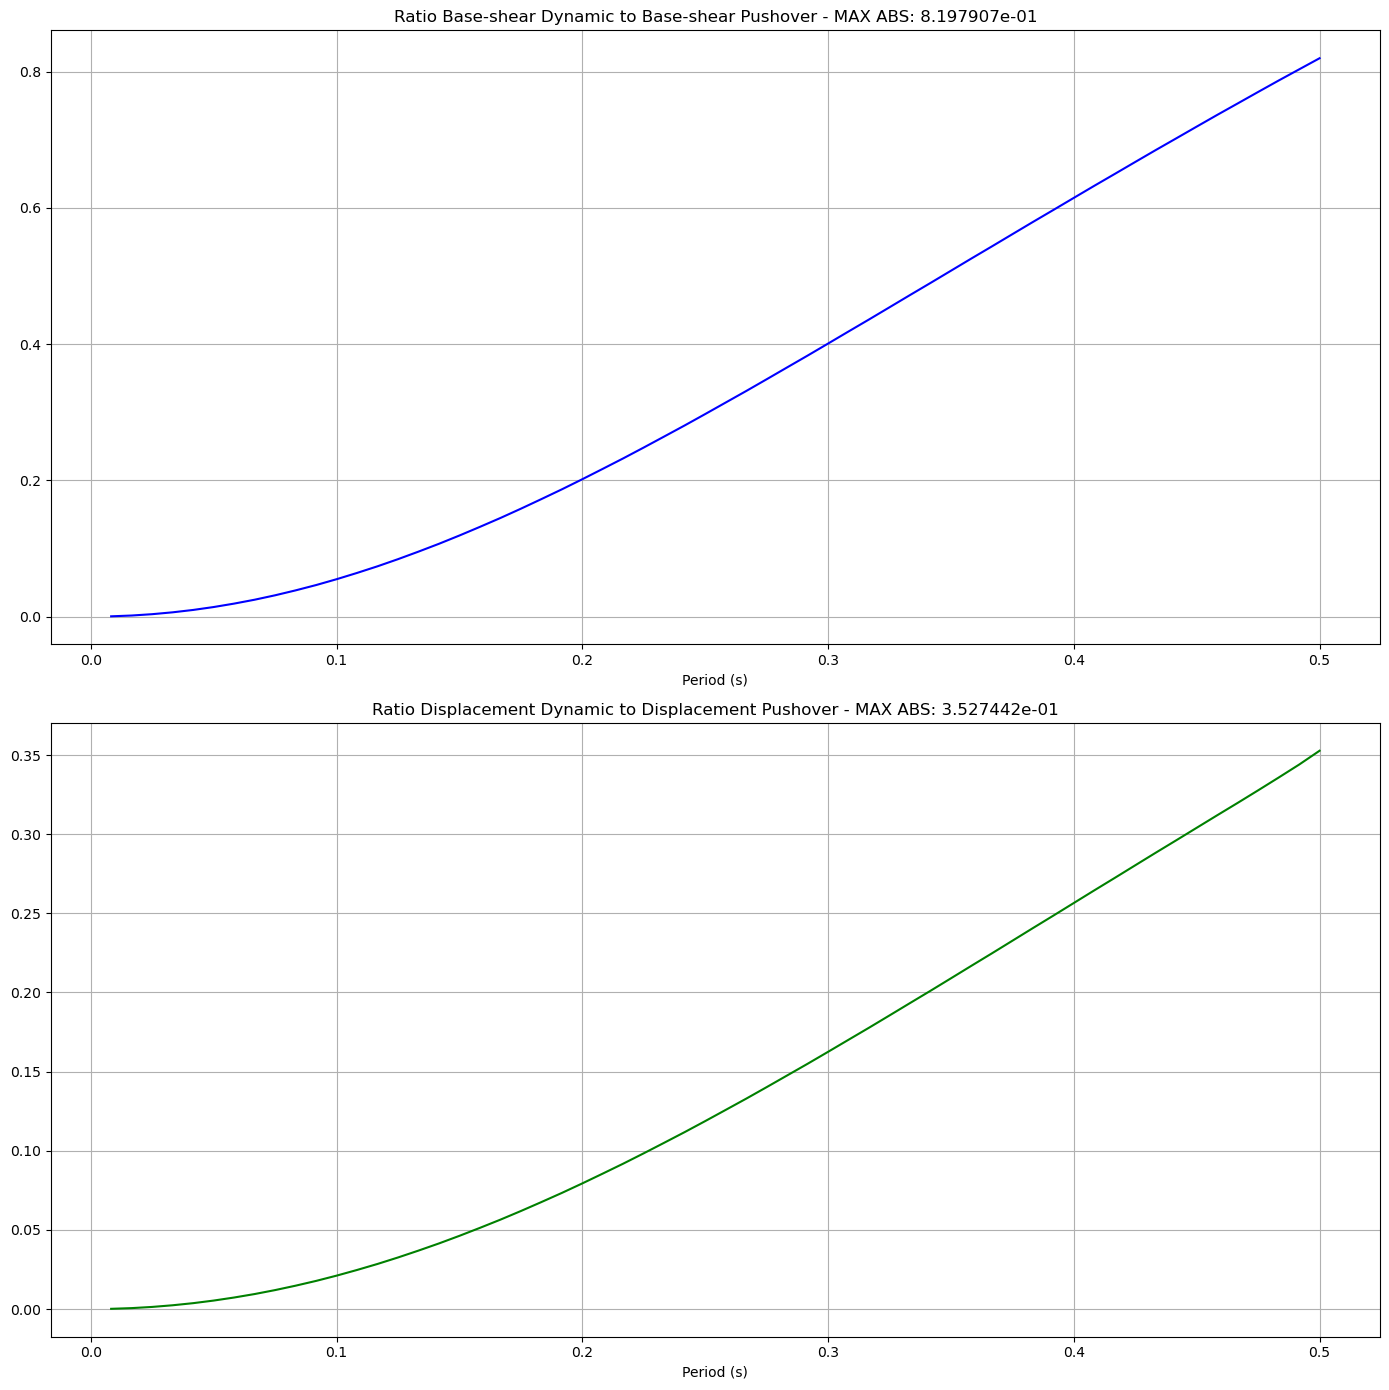

In [43]:
xlabel = 'Period (s)'
y1label = 'Ratio Base-shear Dynamic to Base-shear Pushover'
y2label = 'Ratio Displacement Dynamic to Displacement Pushover'
PLOT_TIME_HIS(period, xlabel, bDbP, y1label, dDdP, y2label, _, _, _, _, Z = 2, LOGX = 0, LOGY = 0)

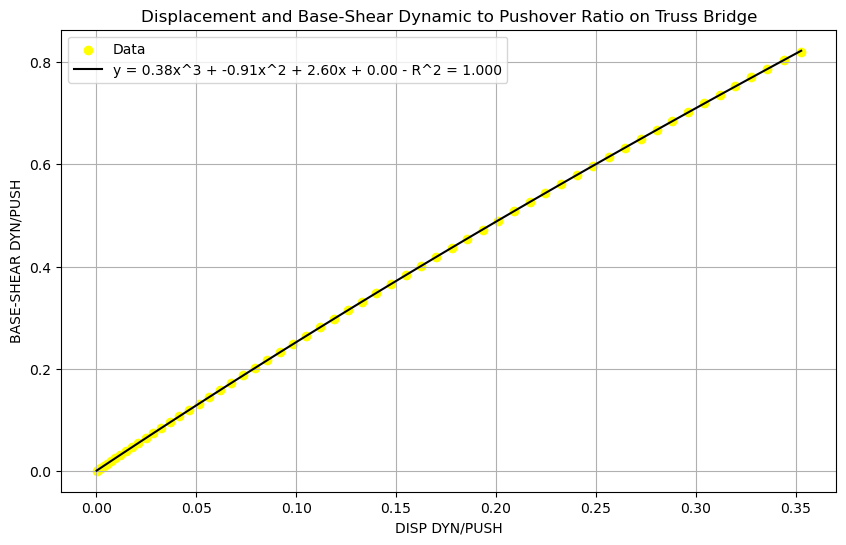

In [44]:
# Data usage
X = dDdP
Y = bDbP
XLABEL = 'DISP DYN/PUSH'
YLABEL = 'BASE-SHEAR DYN/PUSH'
TITLE = 'Displacement and Base-Shear Dynamic to Pushover Ratio on Composite Bridge'
COLOR = 'YELLOW'
PLOT_SCATTER(X, Y, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 3)

In [ ]:
HISROGRAM_BOXPLOT(pgd, HISTO_COLOR='blue', LABEL='Displacement Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(pgv, HISTO_COLOR='purple', LABEL='Velocity Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(pgd, HISTO_COLOR='blue', LABEL='Displacement Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(pgb, HISTO_COLOR='orange', LABEL='Base-shear Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(pgb, HISTO_COLOR='orange', LABEL='Base-shear Response Spectrum')

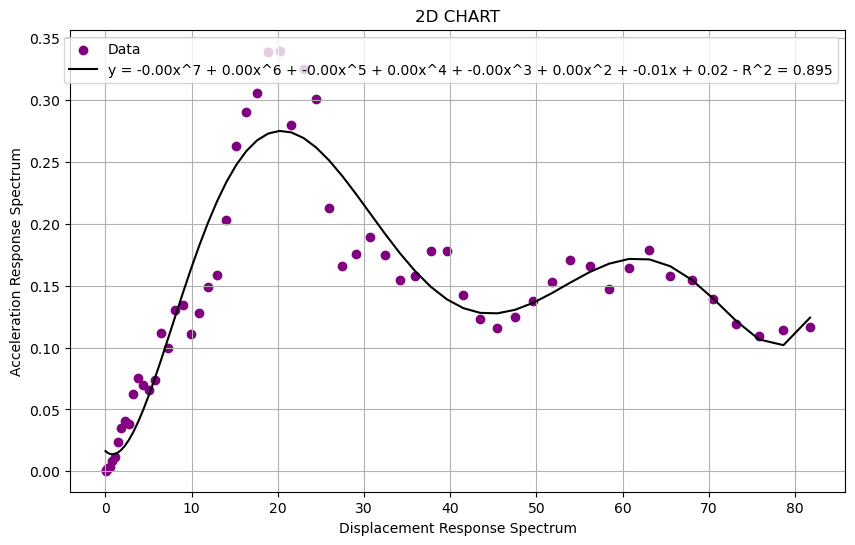

In [45]:
XLABEL = 'Displacement Response Spectrum'
YLABEL = 'Acceleration Response Spectrum'
TITLE = '2D CHART'
COLOR = 'purple'
PLOT_SCATTER(pgd, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(pgd, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 

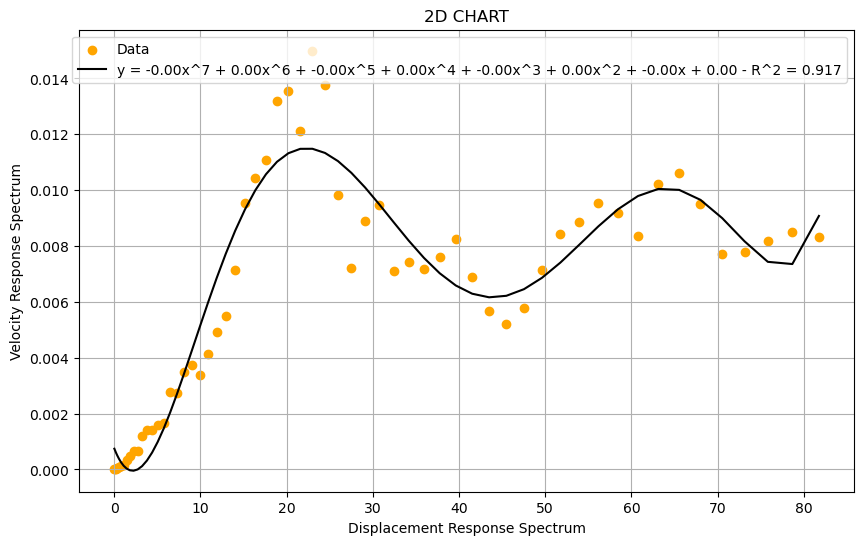

In [46]:
XLABEL = 'Displacement Response Spectrum'
YLABEL = 'Velocity Response Spectrum'
TITLE = '2D CHART'
COLOR = 'orange'
PLOT_SCATTER(pgd, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(pgd, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 

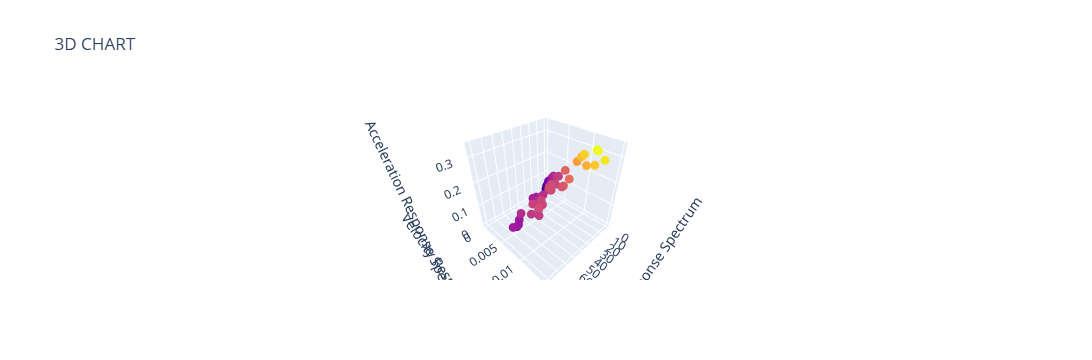

In [47]:
XLABEL = 'Displacement Response Spectrum'
YLABEL = 'Velocity Response Spectrum'
ZLABEL = 'Acceleration Response Spectrum'
TITLE = '3D CHART'
PLOT3D(pgd, pgv, pga, XLABEL, YLABEL, ZLABEL, TITLE)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5272\4171905578.py:275: RankWarning:

Polyfit may be poorly conditioned



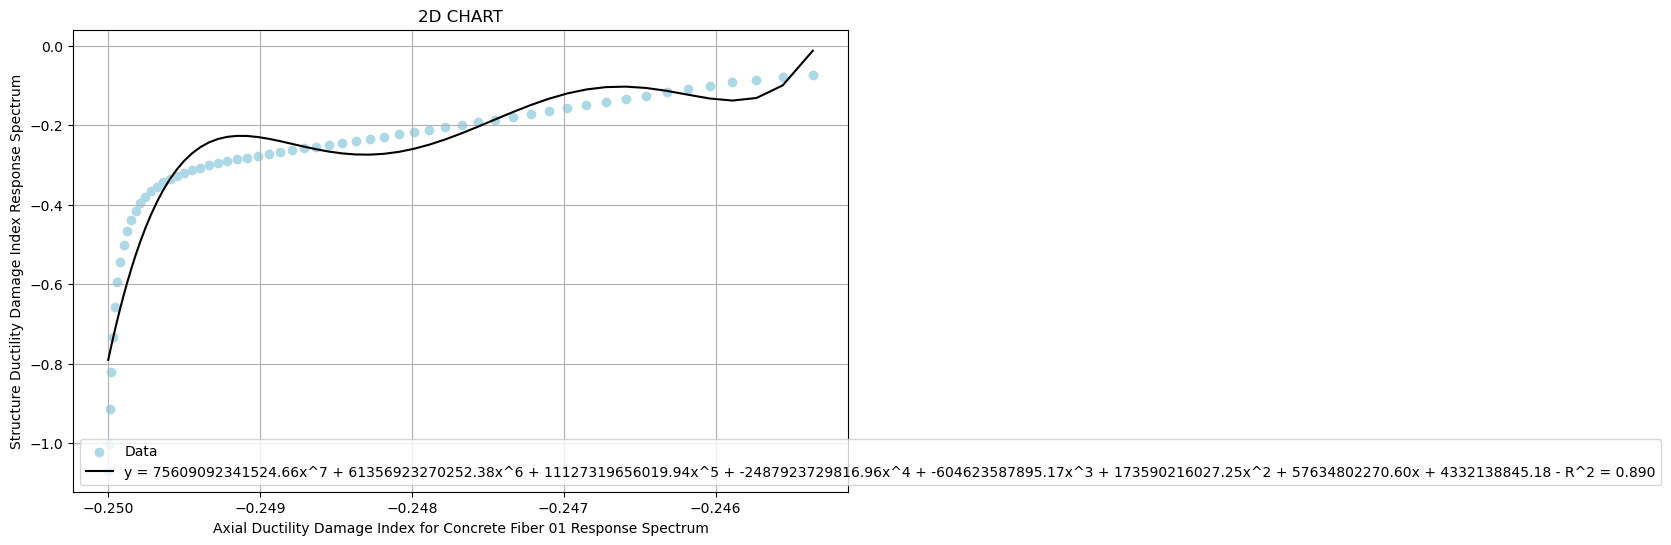

In [48]:
XLABEL = 'Axial Ductility Damage Index for Concrete Fiber 01 Response Spectrum'
YLABEL ='Structure Ductility Damage Index Response Spectrum'
TITLE = '2D CHART'
COLOR = 'lightblue'
PLOT_SCATTER(diAC01, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(diAC01, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5272\4171905578.py:275: RankWarning:

Polyfit may be poorly conditioned



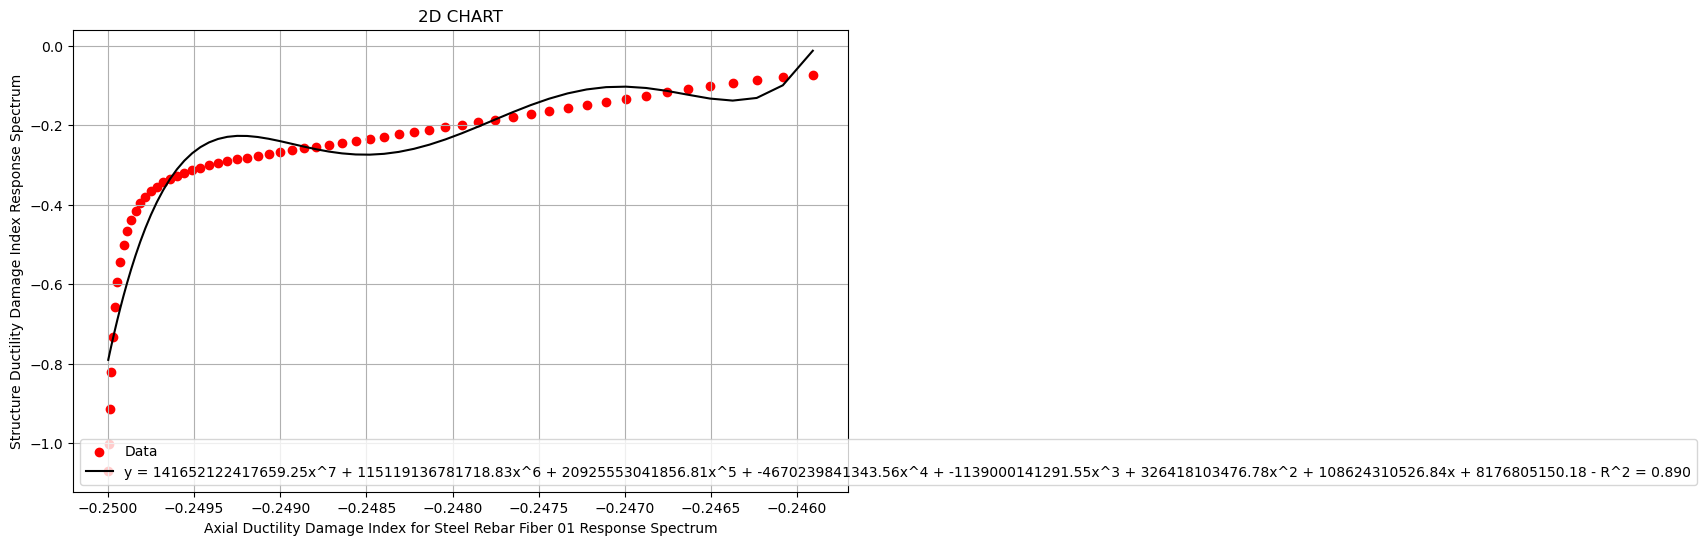

In [49]:
XLABEL = 'Axial Ductility Damage Index for Steel Rebar Fiber 01 Response Spectrum'
YLABEL ='Structure Ductility Damage Index Response Spectrum'
TITLE = '2D CHART'
COLOR = 'red'
PLOT_SCATTER(diAS01, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(diAS01, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

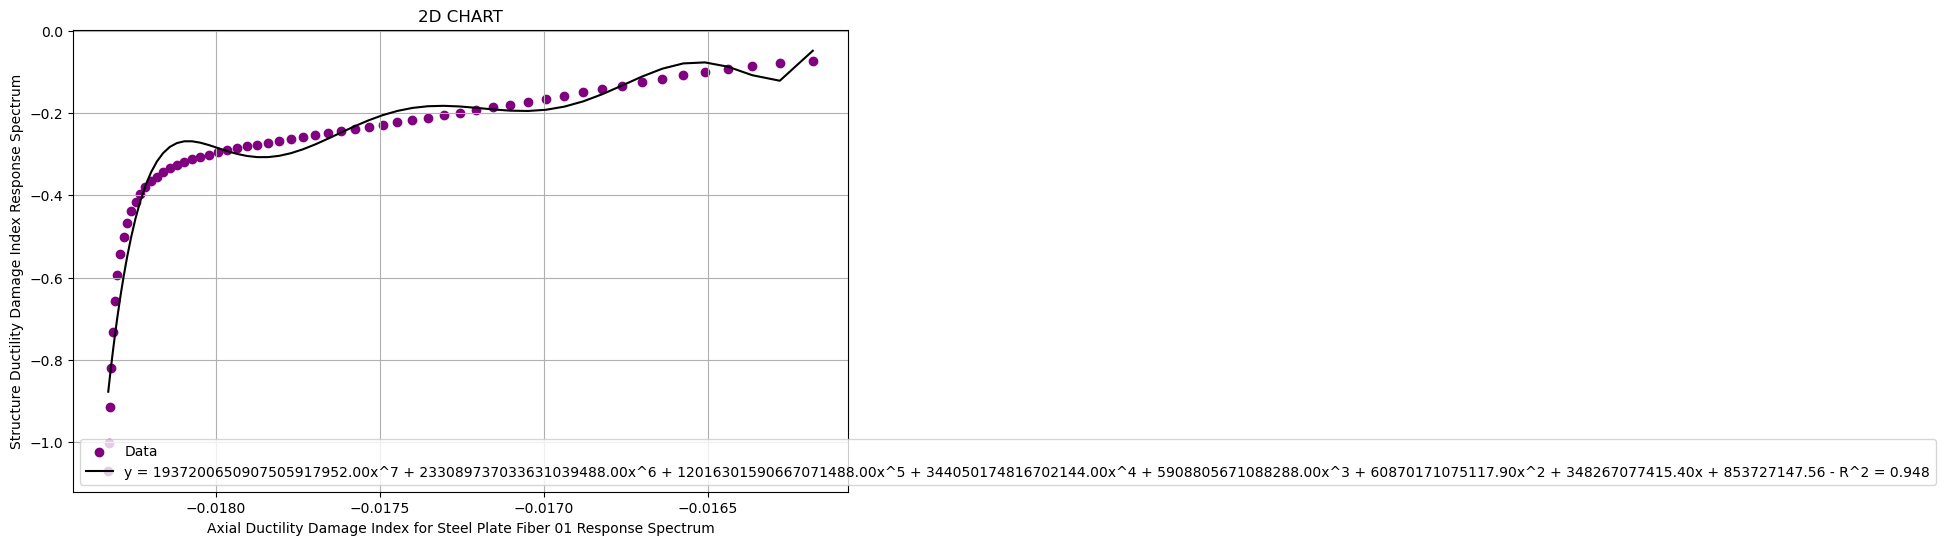

In [50]:
XLABEL = 'Axial Ductility Damage Index for Steel Plate Fiber 01 Response Spectrum'
YLABEL ='Structure Ductility Damage Index Response Spectrum'
TITLE = '2D CHART'
COLOR = 'purple'
PLOT_SCATTER(diASP01, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(diASP01, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

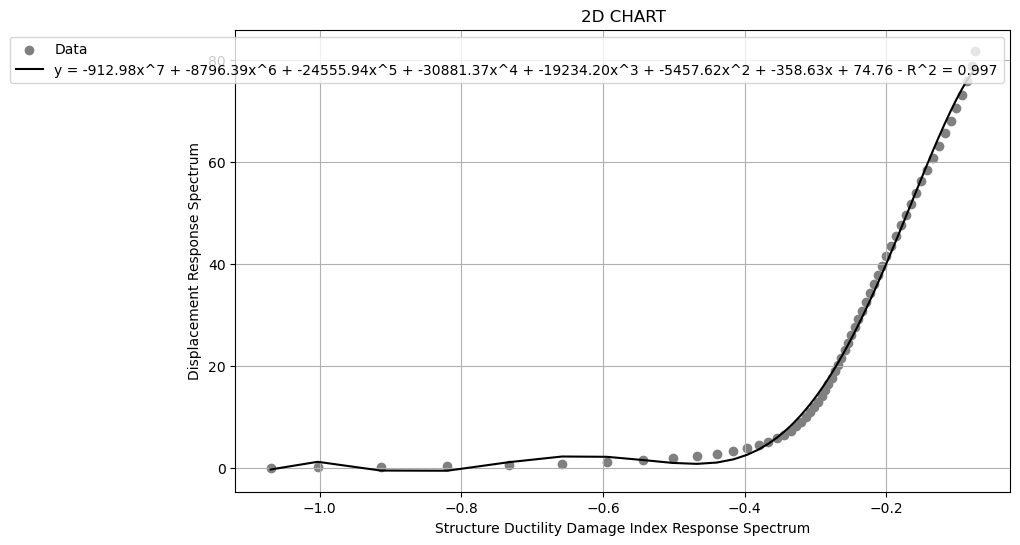

In [51]:
XLABEL = 'Structure Ductility Damage Index Response Spectrum'
YLABEL = 'Displacement Response Spectrum'
TITLE = '2D CHART'
COLOR = 'gray'
PLOT_SCATTER(diS, pgd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(diS, pgd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

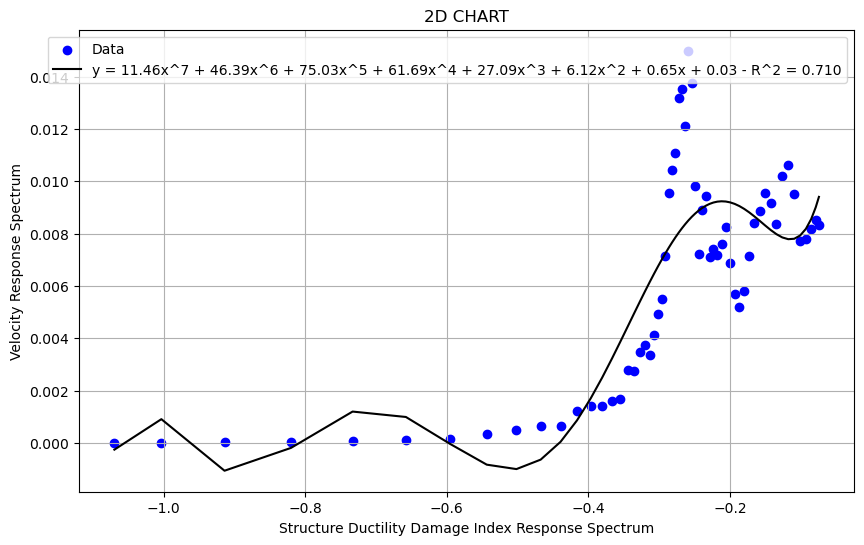

In [52]:
XLABEL = 'Structure Ductility Damage Index Response Spectrum'
YLABEL = 'Velocity Response Spectrum'
TITLE = '2D CHART'
COLOR = 'blue'
PLOT_SCATTER(diS, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(diS, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

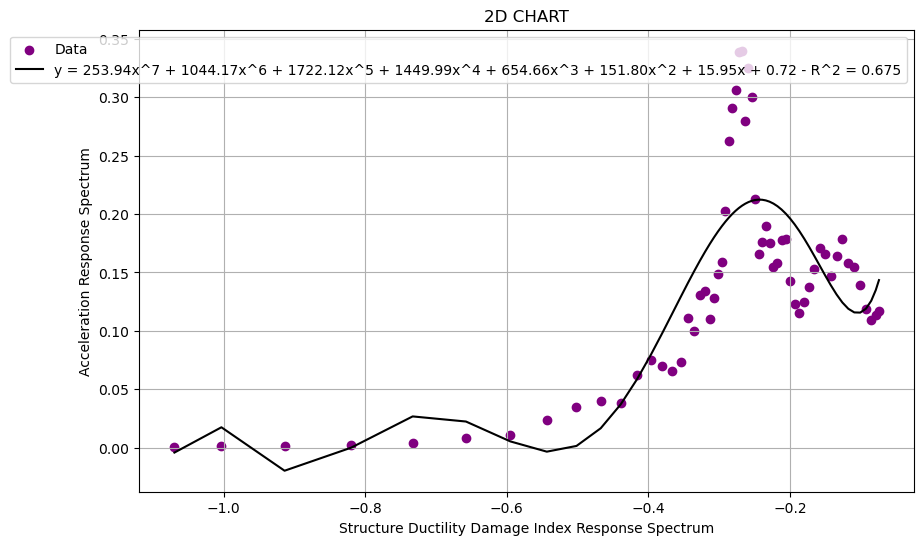

In [53]:
XLABEL = 'Structure Ductility Damage Index Response Spectrum'
YLABEL = 'Acceleration Response Spectrum'
TITLE = '2D CHART'
COLOR = 'purple'
PLOT_SCATTER(diS, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#PLOT_SCATTER_PLOTLY(diS, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

In [54]:
### LAST LOAD DATA
import numpy as np
## PYSHOVER ANALYSIS DATA
# Displacement Time History
DTHP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2)
# Base Shear Time History 01
BTH01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2)
# Base Shear Time History 101
BTH0101 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, i, 2)

BTHP = abs(BTH01 + BTH0101)

print(len(DTHP), len(BTHP))

## DYNAMAIC ANALYSIS DATA
# Displacement Time History
DTHD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, i, 2)
# Velocity Time History
VTH = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'VTH_DYN', 2, i, 2)
# Acceleration Time History
ATH = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'ATH_DYN', 2, i, 2)
# Base Shear Time History 01
BTH01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_01', 2, i, 2)
# Base Shear Time History 101
BTH0101 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_101', 2, i, 2)
# Total Base Shear
BTHD = BTH01 + BTH0101

print(len(DTHD), len(VTH),len(ATH),len(BTHD))


1010 1010
1010 1010 1010 1010


1010
1010 1010
322684.7183875011


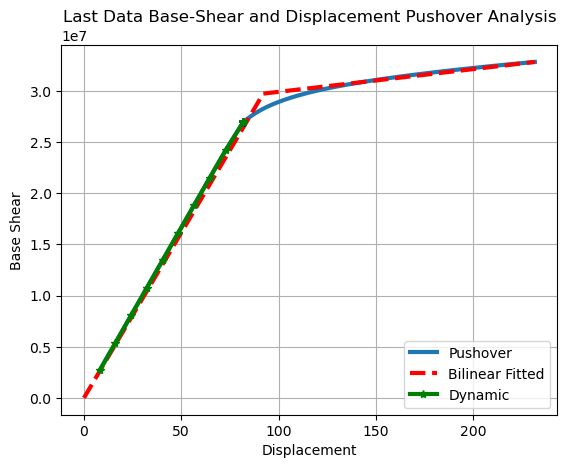

			 Structure Ductility Damage Index: -0.074
			 Structure Ductility ratio: 2.516


In [55]:
print(len(BTHP))
print(len(BTHD), len(DTHD))
xx, yy, _, _, _, _, _ = BILNEAR_CURVE(abs(DTHP), abs(BTHP), 30)
print(yy[1]/ xx[1])
#demand_disp = MAXABS_FUN(DATA_FILE01, 1, i)# DEMAND DYNAMIC DISPLACEMENT
XLABEL = 'Displacement'
YLABEL = 'Base Shear'
TITLE = 'Last Data Base-Shear and Displacement Pushover Analysis'
LEGEND01 = 'Pushover'
LEGEND02 = 'Bilinear Fitted'
LEGEND03 = 'Dynamic'
COLOR = 'black'
PLOT_2D(abs(DTHP), abs(BTHP), xx, yy, abs(DTHD), abs(BTHD), XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR='black', Z=3) 
DIs = (demand_disp - xx[1]) / (xx[2] - xx[1])
print(f'\t\t\t Structure Ductility Damage Index: {DIs:.3f}')
print(f'\t\t\t Structure Ductility ratio: {xx[2] / xx[1]:.3f}')

1010


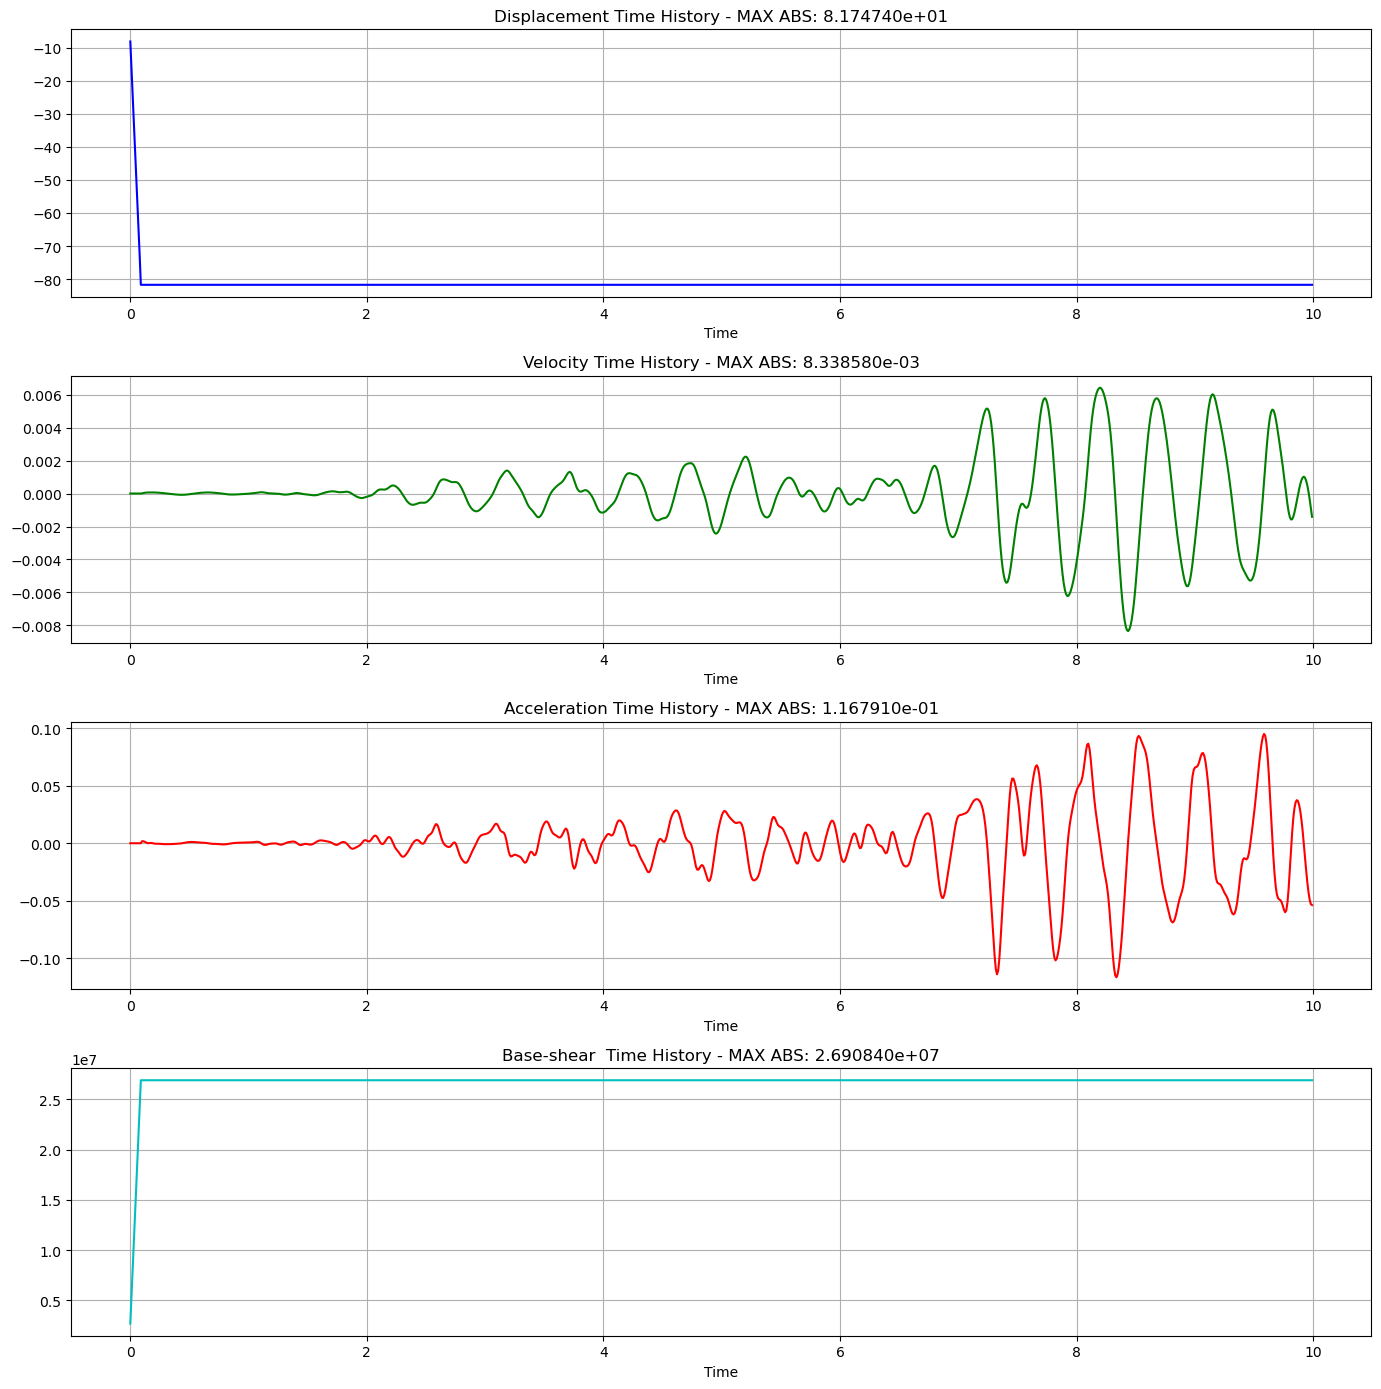

In [56]:
xlabel = 'Time'
y1label = 'Displacement Time History'
y2label = 'Velocity Time History'
y3label = 'Acceleration Time History'
y4label = 'Base-shear  Time History'
MAX_TIME = 10 # DATA MUST BE GOTTEN FROM GROUND MOTION TIME HISTORY
DT  = MAX_TIME / len(DTHD)
TIME = np.arange(0, MAX_TIME , DT)
print(len(TIME))
PLOT_TIME_HIS(TIME, xlabel, DTHD, y1label, VTH, y2label, ATH, y3label, BTHD, y4label, Z = 4, LOGX = 0, LOGY = 0)

In [57]:
# OUTPUT SHEAR AND MOMENT FOR LAST ANALYSIS DATA ELEMENT
# 49 IS THE LAST OUTPUT DATA
NodeJOINT = [] # Joint Counts
AXIAL_P = [] # Internal Shear Force - PUSHOVER
SHEAR_P = [] # Internal Shear Force - PUSHOVER
MOMENT_P = [] # Internal Moment Force - PUSHOVER
AXIAL_D = [] # Internal Shear Force - DYNAMIC
SHEAR_D = [] # Internal Shear Force - DYNAMIC
MOMENT_D = [] # Internal Moment Force - DYNAMIC
II = NUM_ITERATION-1 # LAST COUNT ANALYSIS
for i in range(0, num_nodes-1):
    NodeJOINT.append(i+1)
    # PUSHOVER
    axial_P = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'LOCALFORCE_PUSH_{i}', 4, II, 2))) # Element Internal Force - Axial
    shear_P = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'LOCALFORCE_PUSH_{i}', 5, II, 2))) # Element Internal Force - Shear
    moment_P = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'LOCALFORCE_PUSH_{i}', 6, II, 2))) # Element Internal Force - Moment
    AXIAL_P.append(axial_P);SHEAR_P.append(shear_P);MOMENT_P.append(moment_P);
    # DYNAMIC
    axial_D = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'LOCALFORCE_DYN_{i}', 4, II, 2))) # Element Internal Force - Axial
    shear_D = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'LOCALFORCE_DYN_{i}', 5, II, 2))) # Element Internal Force - Shear
    moment_D = np.max(np.abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,f'LOCALFORCE_DYN_{i}', 6, II, 2))) # Element Internal Force - Moment
    AXIAL_D.append(axial_D);SHEAR_D.append(shear_D);MOMENT_D.append(moment_D);
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


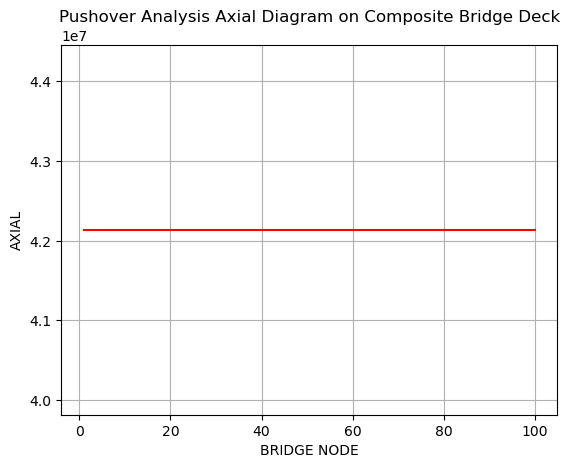

In [58]:
# Data usage
x = NodeJOINT

XLABEL = 'BRIDGE NODE'
YLABEL = 'AXIAL'
TITLE = 'Pushover Analysis Axial Diagram on Composite Bridge Deck'
LABELS = ''
PLOT_2D(NodeJOINT, AXIAL_P, _, _, _, _, XLABEL, YLABEL, TITLE, _, _, _, COLOR='red', Z=1)

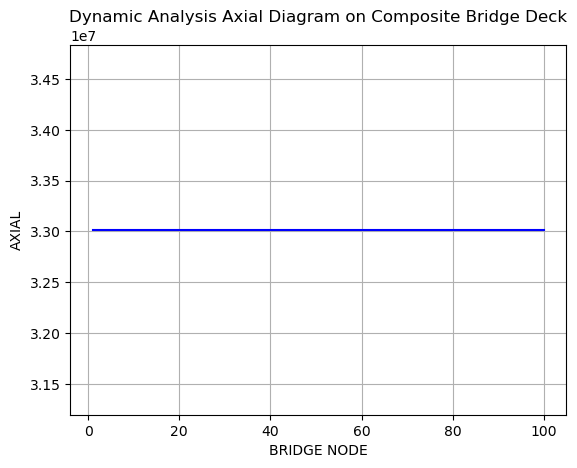

In [59]:
# Data usage
x = NodeJOINT

XLABEL = 'BRIDGE NODE'
YLABEL = 'AXIAL'
TITLE = 'Dynamic Analysis Axial Diagram on Composite Bridge Deck'
LABELS = ''
PLOT_2D(NodeJOINT, AXIAL_D, _, _, _, _, XLABEL, YLABEL, TITLE, _, _, _, COLOR='blue', Z=1)

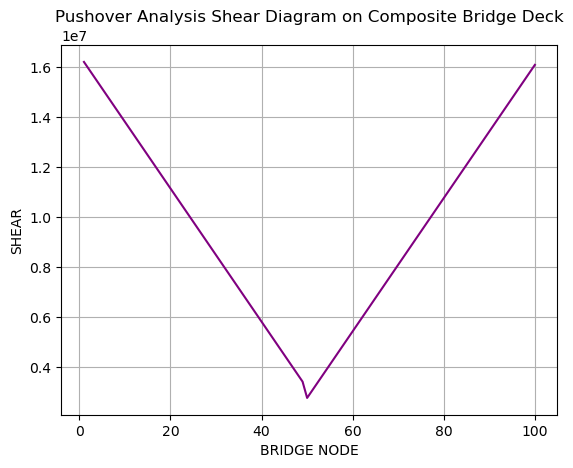

In [60]:
# Data usage
x = NodeJOINT

XLABEL = 'BRIDGE NODE'
YLABEL = 'SHEAR'
TITLE = 'Pushover Analysis Shear Diagram on Composite Bridge Deck'
LABELS = ''
PLOT_2D(NodeJOINT, SHEAR_P, _, _, _, _, XLABEL, YLABEL, TITLE, _, _, _, COLOR='purple', Z=1)

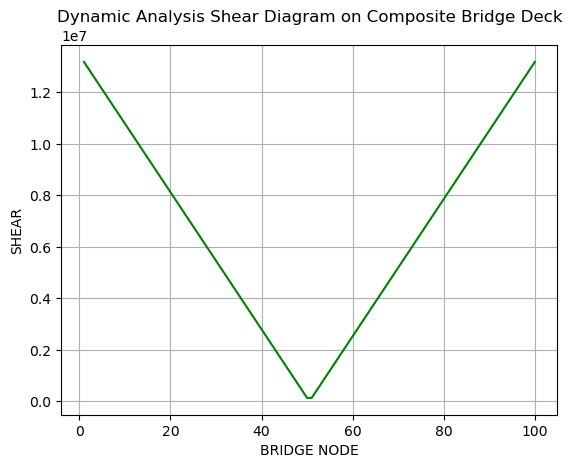

In [61]:
# Data usage
x = NodeJOINT

XLABEL = 'BRIDGE NODE'
YLABEL = 'SHEAR'
TITLE = 'Dynamic Analysis Shear Diagram on Composite Bridge Deck'
LABELS = ''
PLOT_2D(NodeJOINT, SHEAR_D, _, _, _, _, XLABEL, YLABEL, TITLE, _, _, _, COLOR='green', Z=1)

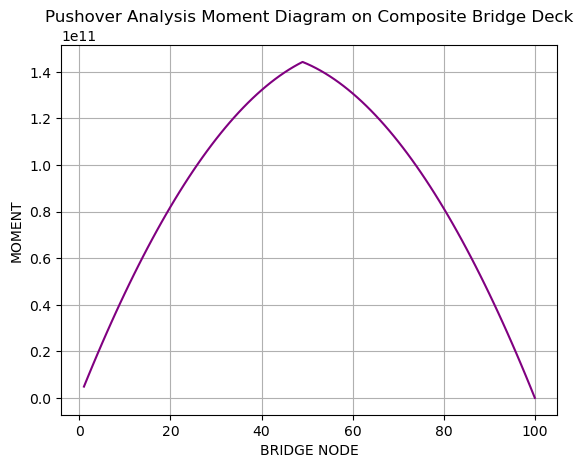

In [62]:
# Data usage
x = NodeJOINT

XLABEL = 'BRIDGE NODE'
YLABEL = 'MOMENT'
TITLE = 'Pushover Analysis Moment Diagram on Composite Bridge Deck'
LABELS = ''
PLOT_2D(NodeJOINT, MOMENT_P, _, _, _, _, XLABEL, YLABEL, TITLE, _, _, _, COLOR='purple', Z=1)

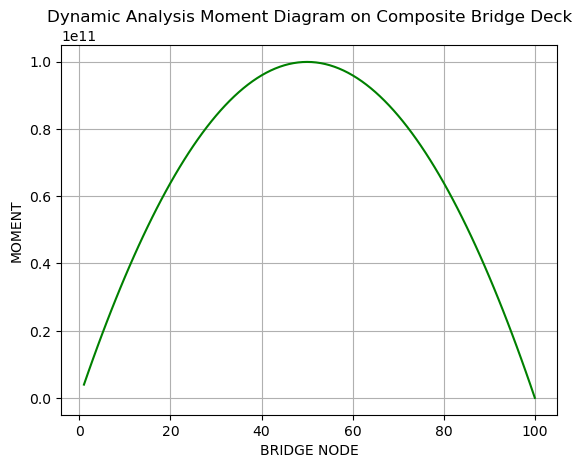

In [63]:
# Data usage
x = NodeJOINT

XLABEL = 'BRIDGE NODE'
YLABEL = 'MOMENT'
TITLE = 'Dynamic Analysis Moment Diagram on Composite Bridge Deck'
LABELS = ''
PLOT_2D(NodeJOINT, MOMENT_D, _, _, _, _, XLABEL, YLABEL, TITLE, _, _, _, COLOR='green', Z=1)

    Displacement Response Spectrum  Velocity Response Spectrum  \
0                         0.022449                    0.000003   
1                         0.089798                    0.000010   
2                         0.202045                    0.000023   
3                         0.359192                    0.000043   
4                         0.561239                    0.000069   
5                         0.808188                    0.000115   
6                         1.100040                    0.000163   
7                         1.436790                    0.000327   
8                         1.818450                    0.000498   
9                         2.245010                    0.000647   
10                        2.716480                    0.000659   
11                        3.232860                    0.001214   
12                        3.794150                    0.001397   
13                        4.400350                    0.001424   
14        

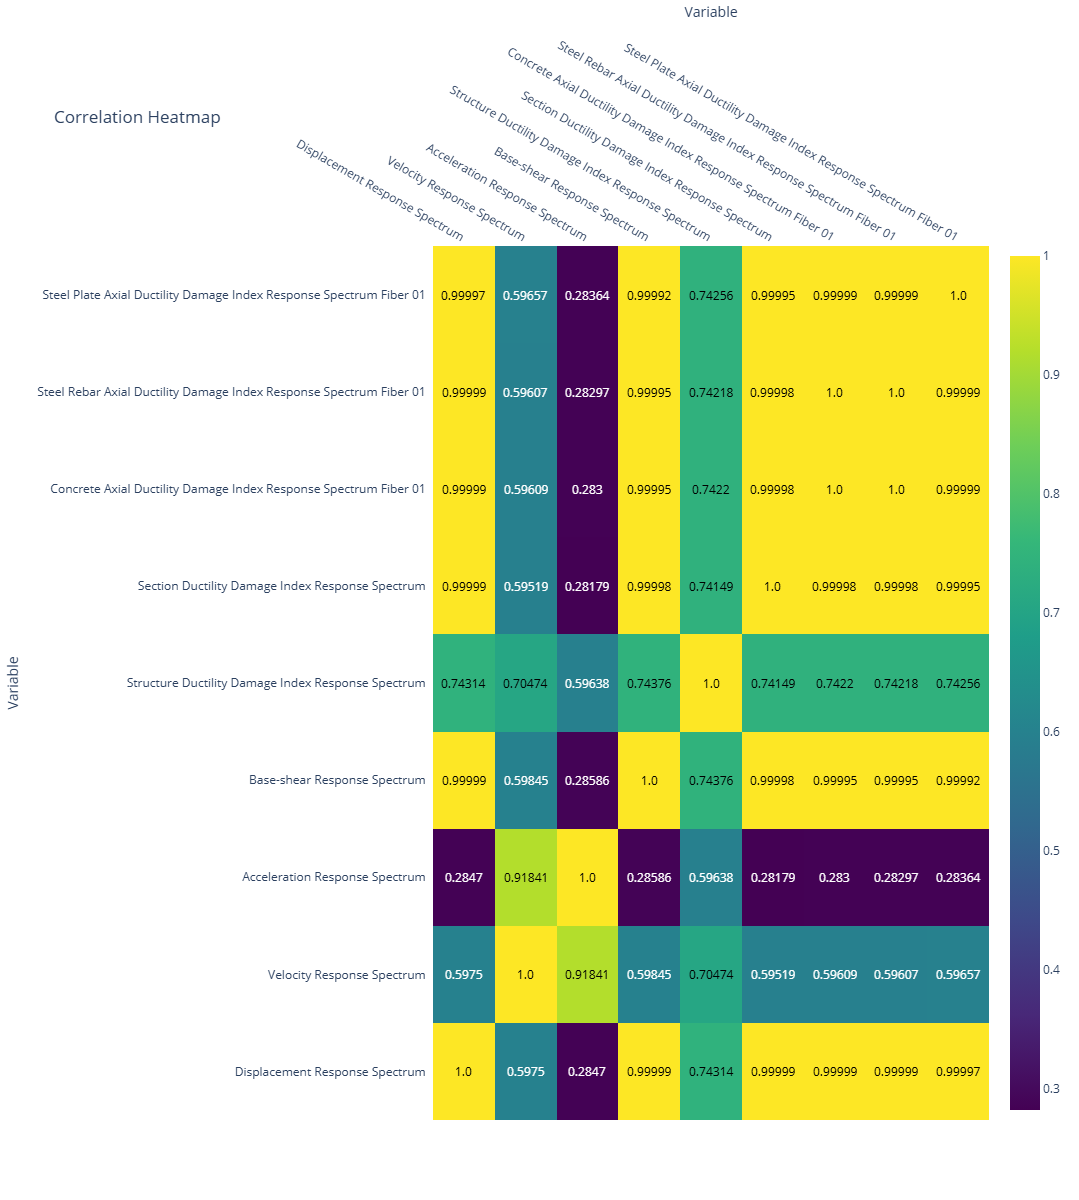

In [64]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame({'Displacement Response Spectrum': pgd,
                   'Velocity Response Spectrum': pgv,
                   'Acceleration Response Spectrum': pga,
                   'Base-shear Response Spectrum': pgb,
                   'Structure Ductility Damage Index Response Spectrum': diS,
                   'Section Ductility Damage Index Response Spectrum': diC,
                   'Concrete Axial Ductility Damage Index Response Spectrum Fiber 01':diAC01,
                   'Steel Rebar Axial Ductility Damage Index Response Spectrum Fiber 01':diAS01,
                   'Steel Plate Axial Ductility Damage Index Response Spectrum Fiber 01':diASP01})
print(df)
# PLOT HEATMAP FOR CORRELATION 
PLOT_HEATMAP(df) 

In [65]:
### Multiple Regression Model
def Multiple_Regression(df):
    import statsmodels.api as sm
    # Add a constant term for the intercept
    X = sm.add_constant(df[['Displacement Response Spectrum',
                            'Velocity Response Spectrum',
                            'Acceleration Response Spectrum',
                            'Base-shear Response Spectrum',
                            'Section Ductility Damage Index Response Spectrum',
                            'Concrete Axial Ductility Damage Index Response Spectrum Fiber 01',
                            'Steel Rebar Axial Ductility Damage Index Response Spectrum Fiber 01',
                            'Steel Plate Axial Ductility Damage Index Response Spectrum Fiber 01']])

    # Fit the multiple regression model
    model = sm.OLS(df['Structure Ductility Damage Index Response Spectrum'], X).fit()

    # Print the summary
    print(model.summary())

Multiple_Regression(df)  

                                            OLS Regression Results                                            
Dep. Variable:     Structure Ductility Damage Index Response Spectrum   R-squared:                       0.809
Model:                                                            OLS   Adj. R-squared:                  0.787
Method:                                                 Least Squares   F-statistic:                     37.41
Date:                                                Fri, 27 Sep 2024   Prob (F-statistic):           2.32e-17
Time:                                                        09:59:10   Log-Likelihood:                 55.787
No. Observations:                                                  60   AIC:                            -97.57
Df Residuals:                                                      53   BIC:                            -82.91
Df Model:                                                           6                                         
C

Lasso Regression Summary
------------------------
Intercept: -0.5029752495878395
Coefficients: [-0.0000000e+00  0.0000000e+00  0.0000000e+00  1.9946663e-08
 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00]
Mean Squared Error: 0.021328272854796212
R-squared: 0.5531785946865856


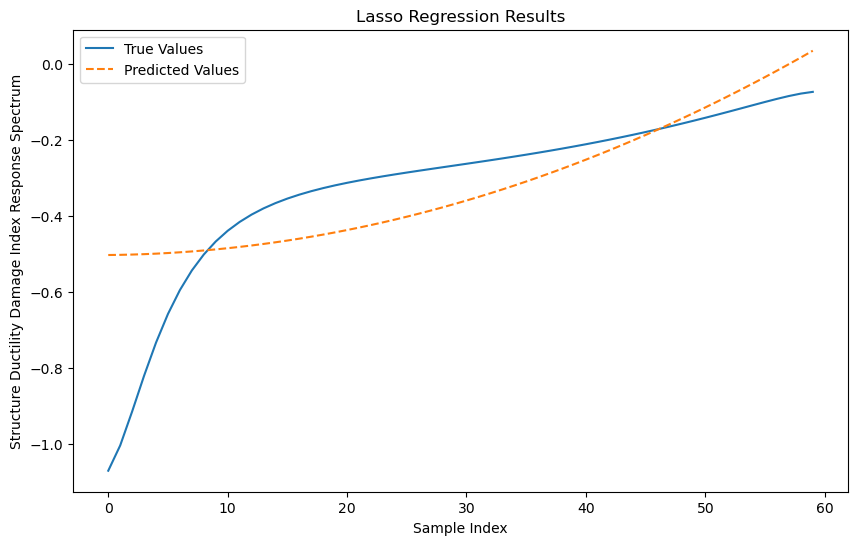

In [66]:
# Run Lasso regression

import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
# Define the target variable and features
X = df.drop(columns=['Structure Ductility Damage Index Response Spectrum'])
y = df['Structure Ductility Damage Index Response Spectrum']

model = Lasso(alpha=0.05)
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Predict the target variable
y_pred = model.predict(X)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the summary
print("Lasso Regression Summary")
print("------------------------")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y, label='True Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
#plt.scatter(y,y_pred)
plt.xlabel('Sample Index')
plt.ylabel('Structure Ductility Damage Index Response Spectrum')
plt.title('Lasso Regression Results')
plt.legend()
plt.show()

Epoch 1/1000


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 100ms/step - loss: 0.0213
Epoch 2/1000
20/20 - 0s - 6ms/step - loss: 0.0072
Epoch 3/1000
20/20 - 0s - 5ms/step - loss: 0.0019
Epoch 4/1000
20/20 - 0s - 6ms/step - loss: 0.0012
Epoch 5/1000
20/20 - 0s - 6ms/step - loss: 0.0011
Epoch 6/1000
20/20 - 0s - 6ms/step - loss: 0.0011
Epoch 7/1000
20/20 - 0s - 6ms/step - loss: 0.0011
Epoch 8/1000
20/20 - 0s - 5ms/step - loss: 0.0011
Epoch 9/1000
20/20 - 0s - 6ms/step - loss: 0.0010
Epoch 10/1000
20/20 - 0s - 6ms/step - loss: 0.0010
Epoch 11/1000
20/20 - 0s - 6ms/step - loss: 9.6703e-04
Epoch 12/1000
20/20 - 0s - 6ms/step - loss: 9.3794e-04
Epoch 13/1000
20/20 - 0s - 7ms/step - loss: 9.1358e-04
Epoch 14/1000
20/20 - 0s - 7ms/step - loss: 8.8350e-04
Epoch 15/1000
20/20 - 0s - 7ms/step - loss: 9.0906e-04
Epoch 16/1000
20/20 - 0s - 6ms/step - loss: 9.0927e-04
Epoch 17/1000
20/20 - 0s - 7ms/step - loss: 9.6949e-04
Epoch 18/1000
20/20 - 0s - 7ms/step - loss: 8.5190e-04
Epoch 19/1000
20/20 - 0s - 7ms/step - loss: 8.2120e-04
Epoch 20/1000
2

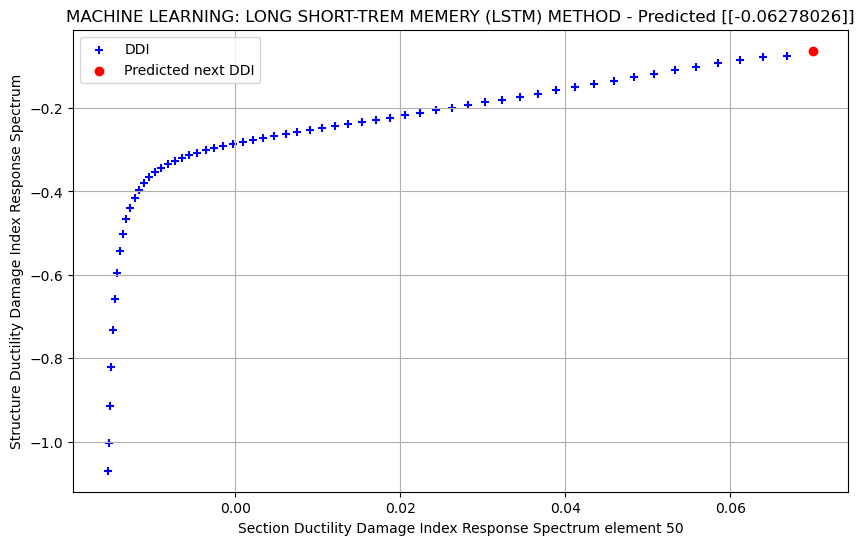

In [22]:
x = diC # Section Ductility Damage Index Response Spectrum element 50
y = diS # Structure Ductility Damage Index Response Spectrum
predicted_y = PREDICT_LSTM(x, y, look_back = 40, ITERATION = 1000)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='+', label='DDI')
plt.scatter(0.07, predicted_y, color='red', marker='o', label='Predicted next DDI')
plt.title(f'MACHINE LEARNING: LONG SHORT-TREM MEMERY (LSTM) METHOD - Predicted {predicted_y}')
plt.xlabel('Section Ductility Damage Index Response Spectrum element 50')
plt.ylabel('Structure Ductility Damage Index Response Spectrum')
plt.legend()
plt.grid()
plt.show()